In [1]:
import torch
from transformers import AutoTokenizer, AutoModel
from Bio import SeqIO
import numpy as np
from sklearn.cluster import KMeans

In [2]:
sequences_list = list(SeqIO.parse("Data/rbcL.fasta", "fasta"))

In [3]:
sequences = [str(sequence.seq) for sequence in sequences_list[:40000]]

In [4]:
for seq_record in sequences:
    print(len(seq_record), end=" ")

907 703 919 907 703 768 804 804 804 804 804 804 801 869 634 633 798 867 894 632 613 789 802 621 800 934 780 727 677 676 632 990 718 900 837 777 769 915 956 925 951 946 945 947 947 941 942 773 773 654 942 615 819 651 883 831 792 648 936 986 696 600 718 718 773 810 780 696 696 696 812 840 852 795 894 759 756 940 624 624 624 624 889 680 680 741 889 961 655 798 716 673 873 834 907 845 876 814 809 852 719 915 899 820 888 780 963 865 925 838 963 895 877 877 876 888 905 870 876 963 963 963 963 957 963 959 905 924 899 916 899 963 963 735 735 735 735 735 742 742 742 742 742 733 742 742 742 742 742 742 742 742 742 742 742 742 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 774 908 919 769 820 751 870 817 654 903 925 786 735 735 735 735 735 742 742 742 742 742 742 774 774 774 774 774 774 774 774 774 774 774 742 772 936 754 688 962 672 952 952 921 808 867 904 892 912 817 801 924 792 905 901 905 837 844 887 924 906 931 884 952 915 950 836 913 910 905 912 

In [5]:
sequences_halved = []
for seq in sequences:
    half_length = len(seq) // 2
    sequences_halved.append(seq[:half_length])
sequences = np.array(sequences_halved)

In [6]:
for seq_record in sequences:
    print(len(seq_record), end=" ")

453 351 459 453 351 384 402 402 402 402 402 402 400 434 317 316 399 433 447 316 306 394 401 310 400 467 390 363 338 338 316 495 359 450 418 388 384 457 478 462 475 473 472 473 473 470 471 386 386 327 471 307 409 325 441 415 396 324 468 493 348 300 359 359 386 405 390 348 348 348 406 420 426 397 447 379 378 470 312 312 312 312 444 340 340 370 444 480 327 399 358 336 436 417 453 422 438 407 404 426 359 457 449 410 444 390 481 432 462 419 481 447 438 438 438 444 452 435 438 481 481 481 481 478 481 479 452 462 449 458 449 481 481 367 367 367 367 367 371 371 371 371 371 366 371 371 371 371 371 371 371 371 371 371 371 371 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 387 454 459 384 410 375 435 408 327 451 462 393 367 367 367 367 367 371 371 371 371 371 371 387 387 387 387 387 387 387 387 387 387 387 371 386 468 377 344 481 336 476 476 460 404 433 452 446 456 408 400 462 396 452 450 452 418 422 443 462 453 465 442 476 457 475 418 456 455 452 456 

In [7]:
architecture_name = "Finetuned_DNABERT6"

In [8]:
from transformers import AutoConfig, AutoModel, AutoTokenizer

# load the configuration from the JSON file
config_path = 'Finetuned_DNABERT6/config.json'
config = AutoConfig.from_pretrained(config_path)

# load weights from the .bin file
model = AutoModel.from_pretrained('Finetuned_DNABERT6/pytorch_model.bin', config=config)

# load tokenizer
tokenizer_config_path = "Finetuned_DNABERT6/tokenizer_config.json"
special_tokens_map_path = "Finetuned_DNABERT6/special_tokens_map.json"

with open(tokenizer_config_path, 'r') as tokenizer_config_file:
    tokenizer_config = tokenizer_config_file.read()

with open(special_tokens_map_path, 'r') as special_tokens_map_file:
    special_tokens_map = special_tokens_map_file.read()

tokenizer = AutoTokenizer.from_pretrained(
    'Finetuned_DNABERT6/', 
    tokenizer_config=tokenizer_config,
    special_tokens_map=special_tokens_map,
    use_fast=True
)

model.eval()


Some weights of the model checkpoint at Finetuned_DNABERT6/pytorch_model.bin were not used when initializing BertModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(4101, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
   

In [9]:
print(type(tokenizer))
print(tokenizer('AAAAAA'))
print(tokenizer('AAAATA'))

<class 'transformers.models.bert.tokenization_bert_fast.BertTokenizerFast'>
{'input_ids': [2, 5, 3], 'token_type_ids': [0, 0, 0], 'attention_mask': [1, 1, 1]}
{'input_ids': [2, 9, 3], 'token_type_ids': [0, 0, 0], 'attention_mask': [1, 1, 1]}


In [10]:
# from DNABERT REPO
# https://github.com/jerryji1993/DNABERT/tree/master
def seq2kmer(seq, k):
    """
    Convert original sequence to kmers
    
    Arguments:
    seq -- str, original sequence.
    k -- int, kmer of length k specified.
    
    Returns:
    kmers -- str, kmers separated by space

    """
    kmer = [seq[x:x+k] for x in range(len(seq)+1-k)]
    kmers = " ".join(kmer)
    return kmers

In [11]:
k_mer_seqs = []
for seq in sequences:
    seqt = seq2kmer(seq, 6)
    k_mer_seqs.append(seqt)

In [12]:
len(k_mer_seqs)

40000

In [13]:
print(k_mer_seqs[0])


TTTTTT TTTTTT TTTTTT TTTTTT TTTTTT TTTTTT TTTTTT TTTTTT TTTTTC TTTTCG TTTCGA TTCGAA TCGAAC CGAACT GAACTT AACTTG ACTTGA CTTGAT TTGATC TGATCG GATCGC ATCGCA TCGCAT CGCATC GCATCC CATCCA ATCCAA TCCAAA CCAAAA CAAAAA AAAAAA AAAAAA AAAAAT AAAATC AAATCT AATCTT ATCTTC TCTTCG CTTCGA TTCGAT TCGATA CGATAG GATAGC ATAGCA TAGCAC AGCACG GCACGT CACGTG ACGTGG CGTGGA GTGGAT TGGATC GGATCG GATCGG ATCGGT TCGGTT CGGTTA GGTTAA GTTAAT TTAATT TAATTC AATTCA ATTCAA TTCAAT TCAATA CAATAA AATAAG ATAAGA TAAGAA AAGAAA AGAAAT GAAATG AAATGG AATGGG ATGGGA TGGGAG GGGAGT GGAGTT GAGTTC AGTTCG GTTCGC TTCGCG TCGCGC CGCGCT GCGCTC CGCTCG GCTCGA CTCGAT TCGATT CGATTT GATTTC ATTTCG TTTCGT TTCGTT TCGTTG CGTTGG GTTGGT TTGGTA TGGTAC GGTACC GTACCG TACCGT ACCGTC CCGTCC CGTCCA GTCCAA TCCAAC CCAACC CAACCG AACCGA ACCGAA CCGAAT CGAATG GAATGC AATGCA ATGCAA TGCAAT GCAATT CAATTC AATTCA ATTCAA TTCAAT TCAATA CAATAG AATAGT ATAGTT TAGTTT AGTTTC GTTTCC TTTCCT TTCCTT TCCTTA CCTTAT CTTATG TTATGC TATGCT ATGCTT TGCTTA GCTTAT CTTATG TTATGC TATGCA ATGCAT

In [14]:
save_freq = 4000
batch_size = 400
data_size = len(k_mer_seqs)
file_path = 'embeddings.csv'

embeddings_list = []

for i in range(0, data_size, batch_size):
    tokenized_sequences = tokenizer(k_mer_seqs[i:i + batch_size], padding=True, truncation=True, return_tensors='pt')

    with torch.no_grad():
        outputs = model(**tokenized_sequences)

    embeddings_list.append(outputs.last_hidden_state[:, 0, :])

    if (i + batch_size) % save_freq == 0:

        embeddings = torch.cat(embeddings_list, dim=0)
        embeddings_np = embeddings.detach().numpy()

        with open(file_path, 'a') as file:
            np.savetxt(file, embeddings_np, delimiter=',')

        del embeddings, embeddings_np
        embeddings_list = []

        print(f"Saved {i + batch_size} embeddings")
    
    print(f"{i + batch_size} is done")


400 is done
800 is done
1200 is done
1600 is done
2000 is done
2400 is done
2800 is done
3200 is done
3600 is done
Saved 4000 embeddings
4000 is done
4400 is done
4800 is done
5200 is done
5600 is done
6000 is done
6400 is done
6800 is done
7200 is done
7600 is done
Saved 8000 embeddings
8000 is done
8400 is done
8800 is done
9200 is done
9600 is done
10000 is done
10400 is done
10800 is done
11200 is done
11600 is done
Saved 12000 embeddings
12000 is done
12400 is done
12800 is done
13200 is done
13600 is done
14000 is done
14400 is done
14800 is done
15200 is done
15600 is done
Saved 16000 embeddings
16000 is done
16400 is done
16800 is done
17200 is done
17600 is done
18000 is done
18400 is done
18800 is done
19200 is done
19600 is done
Saved 20000 embeddings
20000 is done
20400 is done
20800 is done
21200 is done
21600 is done
22000 is done
22400 is done
22800 is done
23200 is done
23600 is done
Saved 24000 embeddings
24000 is done
24400 is done
24800 is done
25200 is done
25600 is

In [14]:
embeddings = np.genfromtxt('embeddings.csv', delimiter=',')

In [15]:
embeddings.shape

(40000, 768)

In [16]:

def KMeansOnEmbeddings(embeddings, n_clusters, seed=42, normalize=True):

    # define Kmeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed, max_iter=1500)
    
    # run Kmeans
    cluster_labels = kmeans.fit_predict(embeddings)

    # count labels to see if the clusters look okay ish
    unique_labels, label_counts = np.unique(cluster_labels, return_counts=True)

    for label, count in zip(unique_labels, label_counts):
        print(f"Label {label}: Count {count}")

    return cluster_labels, unique_labels



In [17]:
from sklearn.metrics import pairwise_distances

In [18]:
def pairWiseCrossValidation(embeddings, sequences):
    sum_means = []
    for k in range(3, 50):
        cluster_labels, unique_labels = KMeansOnEmbeddings(embeddings, k)
        means = []
        for ind in unique_labels:
            cluster_sequences = [sequences[i] for i, label in enumerate(cluster_labels) if label == unique_labels[ind]]
            
            means.append(np.mean(pairwise_distances(cluster_sequences, metric="cosine")))
        sum_means.append(np.mean(np.array(means)))
    return np.argmin(sum_means) + 3


In [20]:
from helper import getData

In [21]:
sequences_flat = getData("Data/rbcL_ordinal_encoding_full.txt", 50000)

In [22]:
num_clusters = pairWiseCrossValidation(embeddings, sequences_flat)

Label 0: Count 26630
Label 1: Count 11298
Label 2: Count 2072
Label 0: Count 7293
Label 1: Count 1647
Label 2: Count 23386
Label 3: Count 7674
Label 0: Count 7015
Label 1: Count 15080
Label 2: Count 5360
Label 3: Count 10962
Label 4: Count 1583


Label 0: Count 6022
Label 1: Count 10754
Label 2: Count 14993
Label 3: Count 1198
Label 4: Count 5239
Label 5: Count 1794
Label 0: Count 7227
Label 1: Count 2762
Label 2: Count 4576
Label 3: Count 14849
Label 4: Count 7622
Label 5: Count 1175
Label 6: Count 1789
Label 0: Count 842
Label 1: Count 13061
Label 2: Count 3500
Label 3: Count 4379
Label 4: Count 7754
Label 5: Count 1921
Label 6: Count 1472
Label 7: Count 7071
Label 0: Count 2976
Label 1: Count 14401
Label 2: Count 2576
Label 3: Count 6496
Label 4: Count 7236
Label 5: Count 1155
Label 6: Count 3154
Label 7: Count 1708
Label 8: Count 298
Label 0: Count 2730
Label 1: Count 6760
Label 2: Count 9767
Label 3: Count 2497
Label 4: Count 290
Label 5: Count 5903
Label 6: Count 1129
Label 7: Count 2683
Label 8: Count 1708
Label 9: Count 6533
Label 0: Count 5807
Label 1: Count 2491
Label 2: Count 317
Label 3: Count 751
Label 4: Count 6529
Label 5: Count 1689
Label 6: Count 737
Label 7: Count 9366
Label 8: Count 2585
Label 9: Count 2915
L

In [23]:
print(num_clusters)

45


In [17]:
num_clusters = 45

In [18]:
cluster_labels, unique_labels = KMeansOnEmbeddings(embeddings, num_clusters)

Label 0: Count 149
Label 1: Count 487
Label 2: Count 1964
Label 3: Count 213
Label 4: Count 1046
Label 5: Count 2234
Label 6: Count 472
Label 7: Count 778
Label 8: Count 1998
Label 9: Count 224
Label 10: Count 609
Label 11: Count 1730
Label 12: Count 1367
Label 13: Count 486
Label 14: Count 631
Label 15: Count 612
Label 16: Count 331
Label 17: Count 2600
Label 18: Count 1758
Label 19: Count 1410
Label 20: Count 44
Label 21: Count 528
Label 22: Count 894
Label 23: Count 438
Label 24: Count 68
Label 25: Count 1448
Label 26: Count 840
Label 27: Count 136
Label 28: Count 648
Label 29: Count 580
Label 30: Count 1691
Label 31: Count 635
Label 32: Count 170
Label 33: Count 524
Label 34: Count 1563
Label 35: Count 1630
Label 36: Count 1769
Label 37: Count 406
Label 38: Count 864
Label 39: Count 1050
Label 40: Count 215
Label 41: Count 1756
Label 42: Count 256
Label 43: Count 269
Label 44: Count 479


In [19]:
from helper import *

In [26]:
def empty_decode(seq):
    return seq
def decodeSequences(architecture_name, sequences_list, decoding_function, unique_labels, cluster_labels):
    for cluster_label in unique_labels:
        cluster_sequences = [sequences_list[i] for i, label in enumerate(cluster_labels) if label == cluster_label]
        
        decoded_sequences = []
        for seq in cluster_sequences:
            decoded_seq = decoding_function(seq)
            decoded_sequences.append(decoded_seq)
        
        with open(f'clusters/{architecture_name}/cluster_{cluster_label}.fasta', 'w') as output_file:
            for idx, sequence in enumerate(decoded_sequences):
                output_file.write(f'>Seq_{idx}\n{sequence}\n')

decodeSequences(architecture_name, sequences, empty_decode, unique_labels, cluster_labels)


In [27]:
type(unique_labels)

numpy.ndarray

In [28]:
runClustalRange(architecture_name, 0, num_clusters, unique_labels, True)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Using 16 threads
Read 149 sequences (type: DNA) from clusters/Finetuned_DNABERT6/cluster_0.fasta
Using 52 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 149 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress: 0 % (0 out of 6422)
Ktuple-distance calculation progress: 25 % (1634 out of 6422)
Ktuple-distance calculation progress: 26 % (1670 out of 6422)
Ktuple-distance calculation progress: 28 % (1801 out of 6422)
Ktuple-distance calculation progress: 29 % (1883 out of 6422)
Ktuple-distance calculation progress: 30 % (1927 out of 6422)
Ktuple-distance calculation progress: 32 % (2060 out of 6422

Using 16 threads
Read 1964 sequences (type: DNA) from clusters/Finetuned_DNABERT6/cluster_2.fasta
Using 119 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 1964 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress: 0 % (0 out of 226695)
Ktuple-distance calculation progress: 11 % (25545 out of 226695)
Ktuple-distance calculation progress: 12 % (27205 out of 226695)
Ktuple-distance calculation progress: 13 % (30414 out of 226695)
Ktuple-distance calculation progress: 14 % (32047 out of 226695)
Ktuple-distance calculation progress: 15 % (34098 out of 226695)
Ktuple-distance calculation progress: 19 % (44042 out of 226695)
Ktuple-distance calculation progress: 23 % (53283 out of 226695)
Ktuple-distance calculation progress: 24 % (55593 out of 226695)
Ktuple-distance calculation progress: 25 % (57292 out of 226695)
Ktuple-distance calculation progress: 26 % (59135 out of 226695)
Ktuple-distance calculation progress: 2

In [20]:
gap_percentages = evaluateGapsInRange(architecture_name, 0, num_clusters, unique_labels)


clustal/Finetuned_DNABERT6/cluster_0.clustal
Percentage of gaps in the alignment for cluster 0: 20.91%
clustal/Finetuned_DNABERT6/cluster_1.clustal
Percentage of gaps in the alignment for cluster 1: 45.82%
clustal/Finetuned_DNABERT6/cluster_2.clustal
Percentage of gaps in the alignment for cluster 2: 67.01%
clustal/Finetuned_DNABERT6/cluster_3.clustal
Percentage of gaps in the alignment for cluster 3: 51.35%
clustal/Finetuned_DNABERT6/cluster_4.clustal
Percentage of gaps in the alignment for cluster 4: 59.19%
clustal/Finetuned_DNABERT6/cluster_5.clustal
Percentage of gaps in the alignment for cluster 5: 44.29%
clustal/Finetuned_DNABERT6/cluster_6.clustal
Percentage of gaps in the alignment for cluster 6: 45.07%
clustal/Finetuned_DNABERT6/cluster_7.clustal
Percentage of gaps in the alignment for cluster 7: 63.77%
clustal/Finetuned_DNABERT6/cluster_8.clustal
Percentage of gaps in the alignment for cluster 8: 51.41%
clustal/Finetuned_DNABERT6/cluster_9.clustal
Percentage of gaps in the al

In [30]:
print(countPercentageLowerThan(gap_percentages, 20))

2


Plot for cluster 0


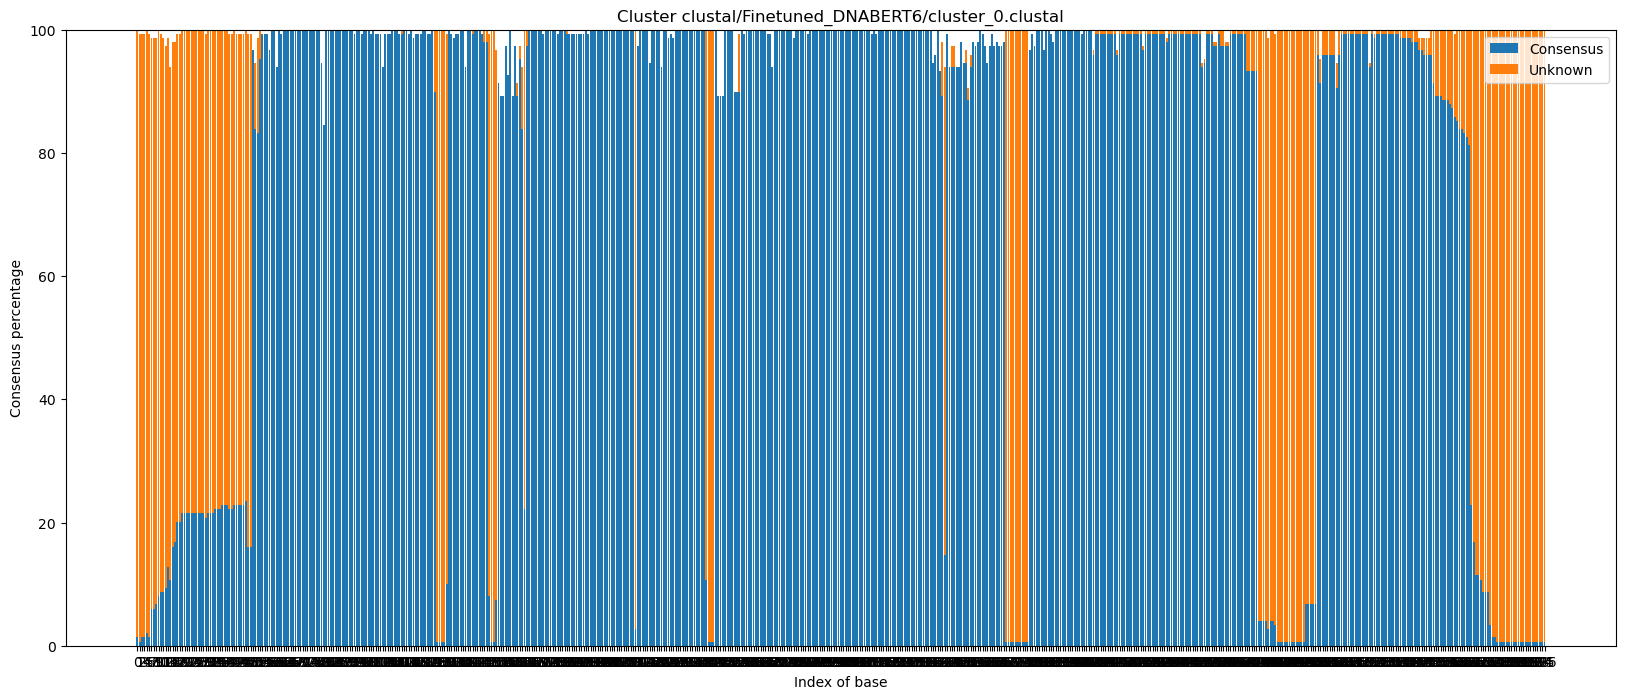

Plot for cluster 1


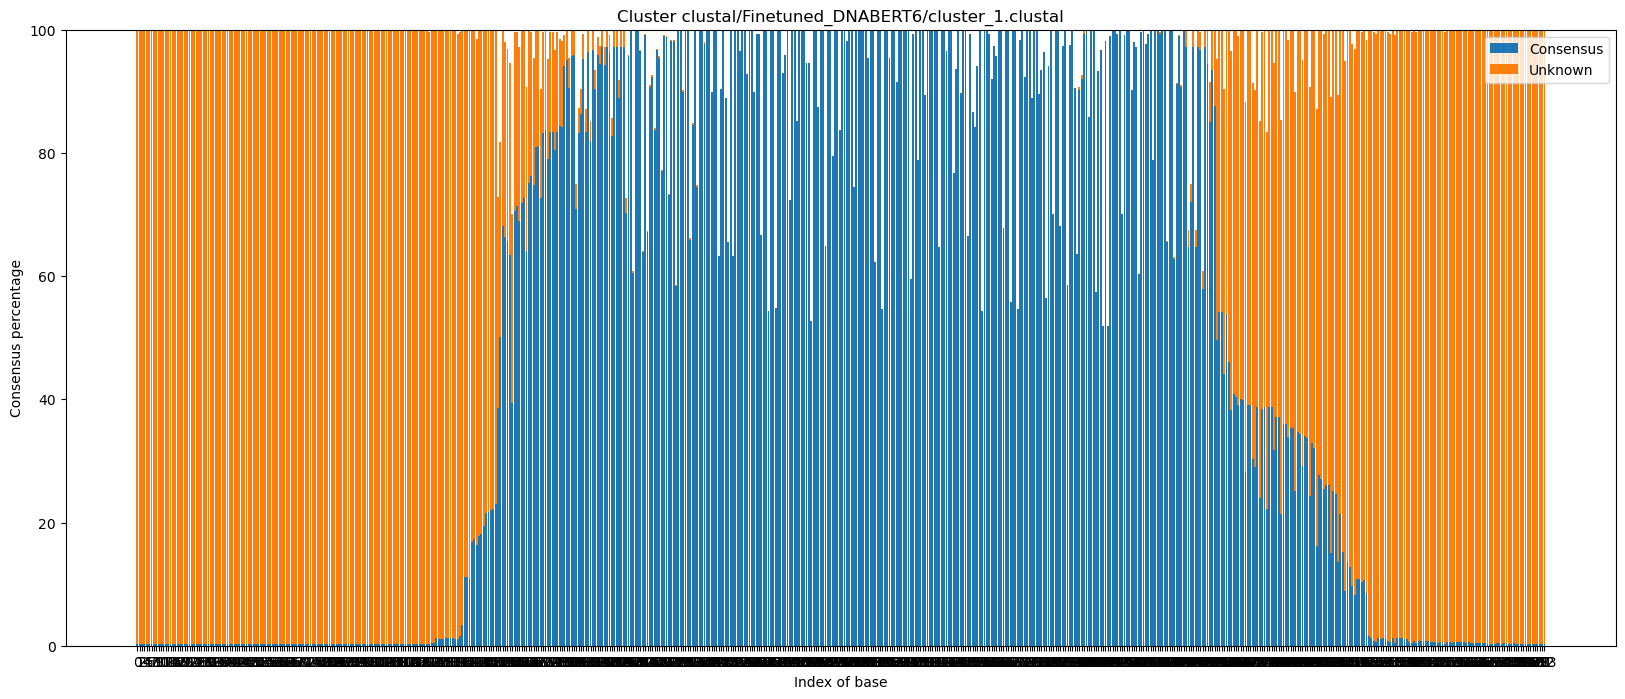

Plot for cluster 2


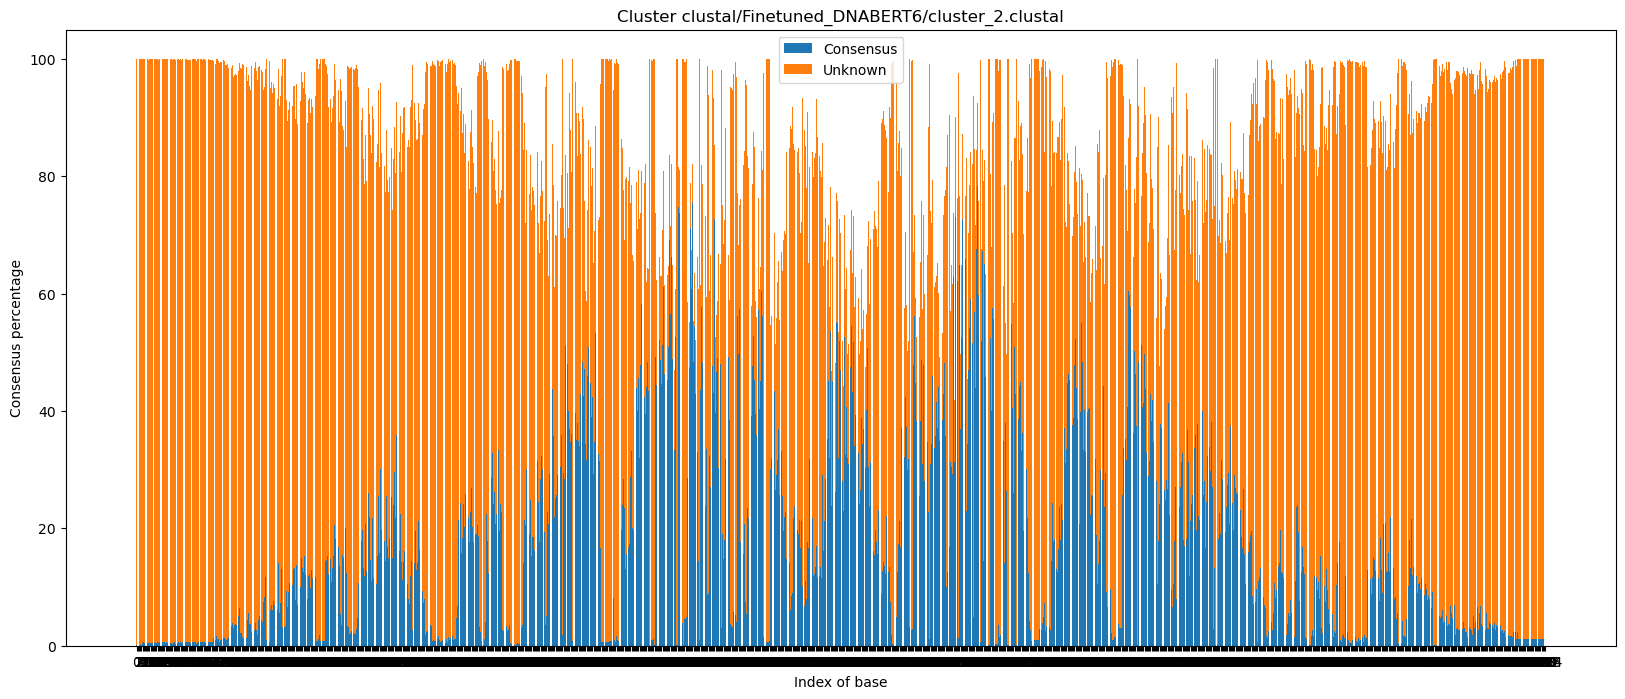

Plot for cluster 3


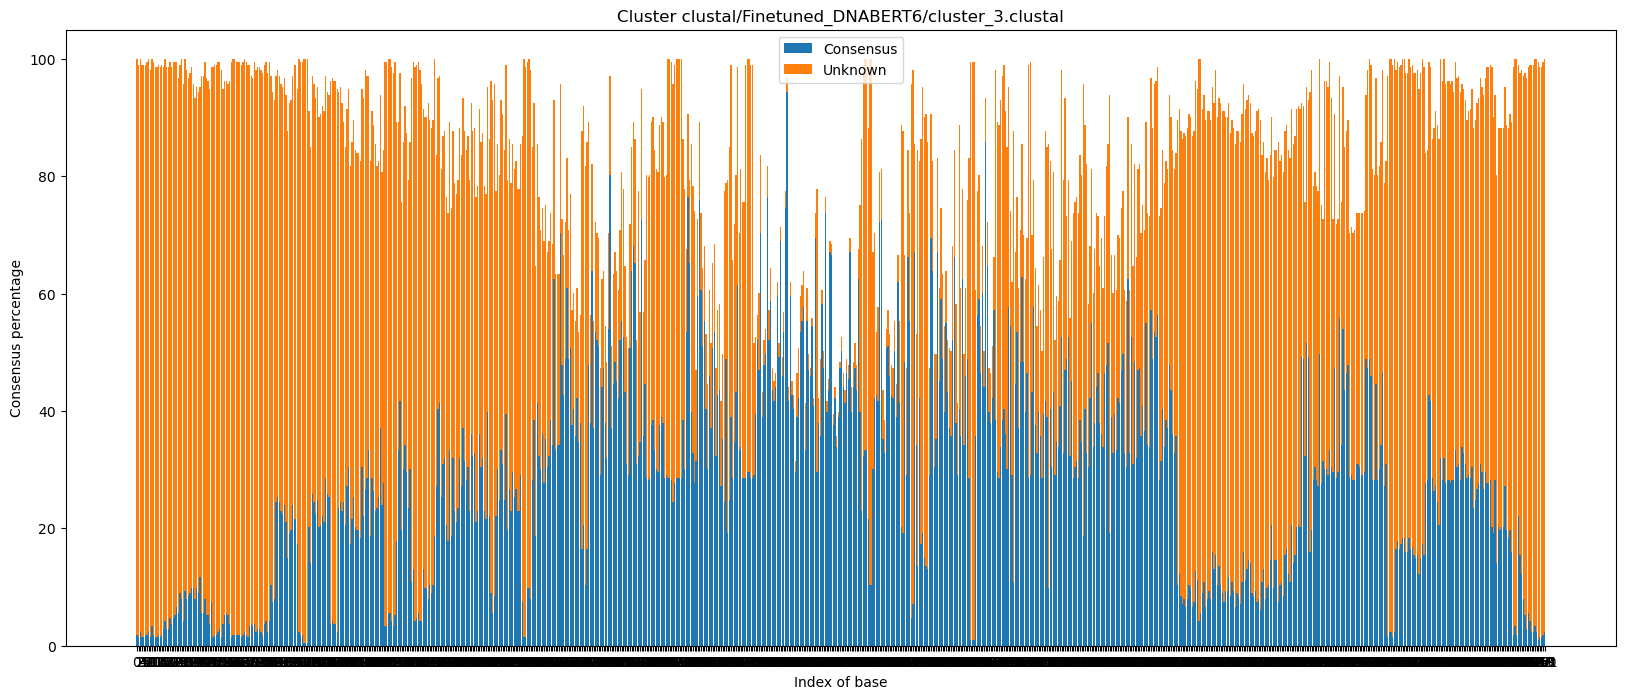

Plot for cluster 4


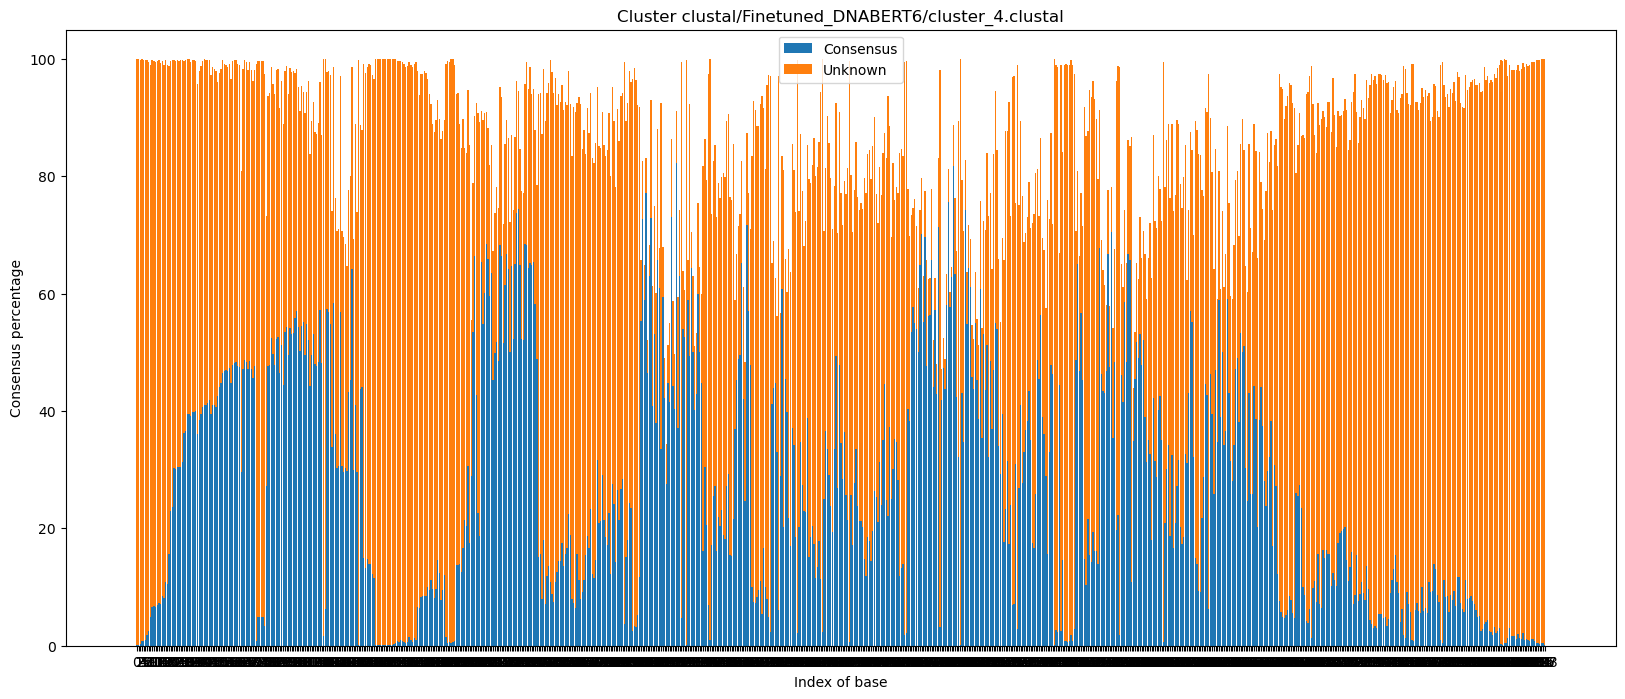

Plot for cluster 5


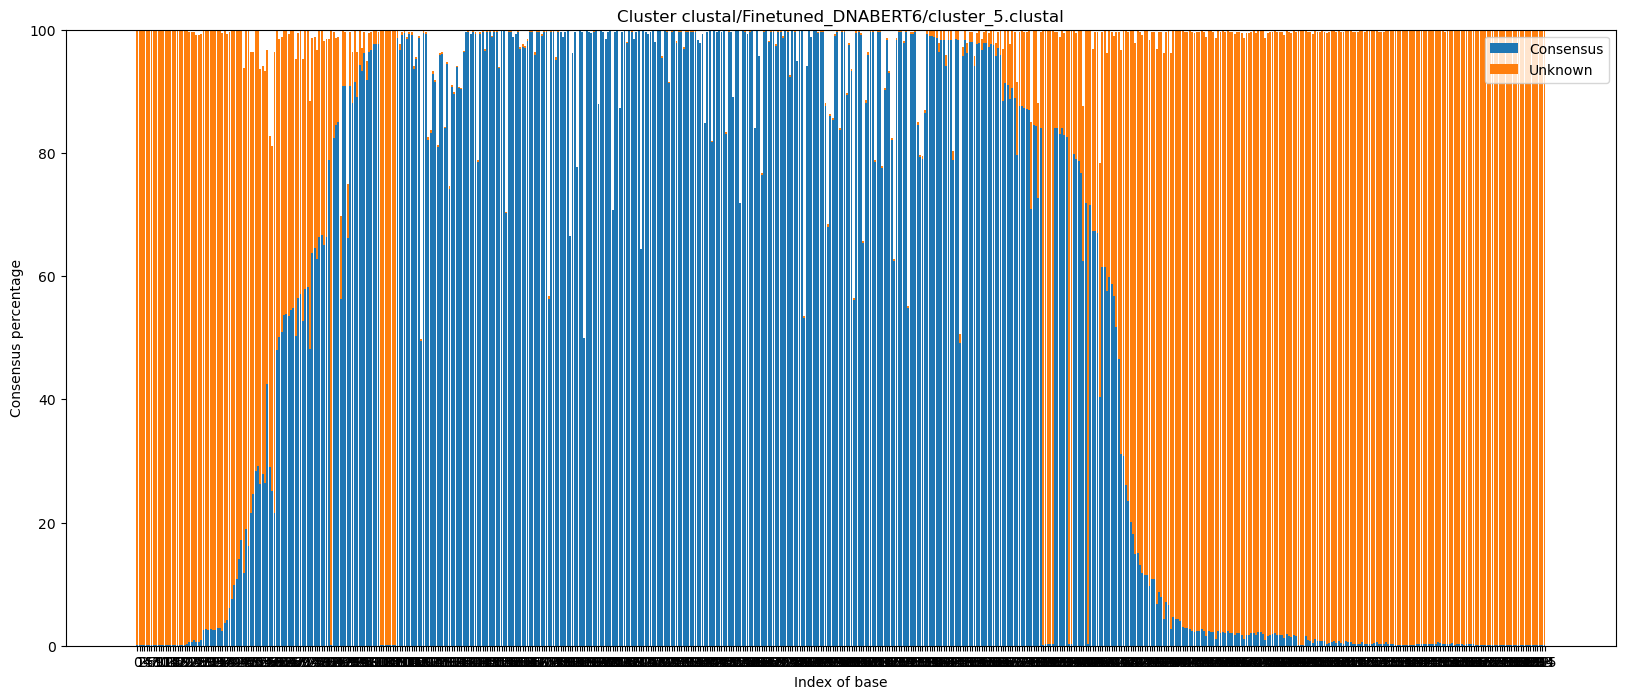

Plot for cluster 6


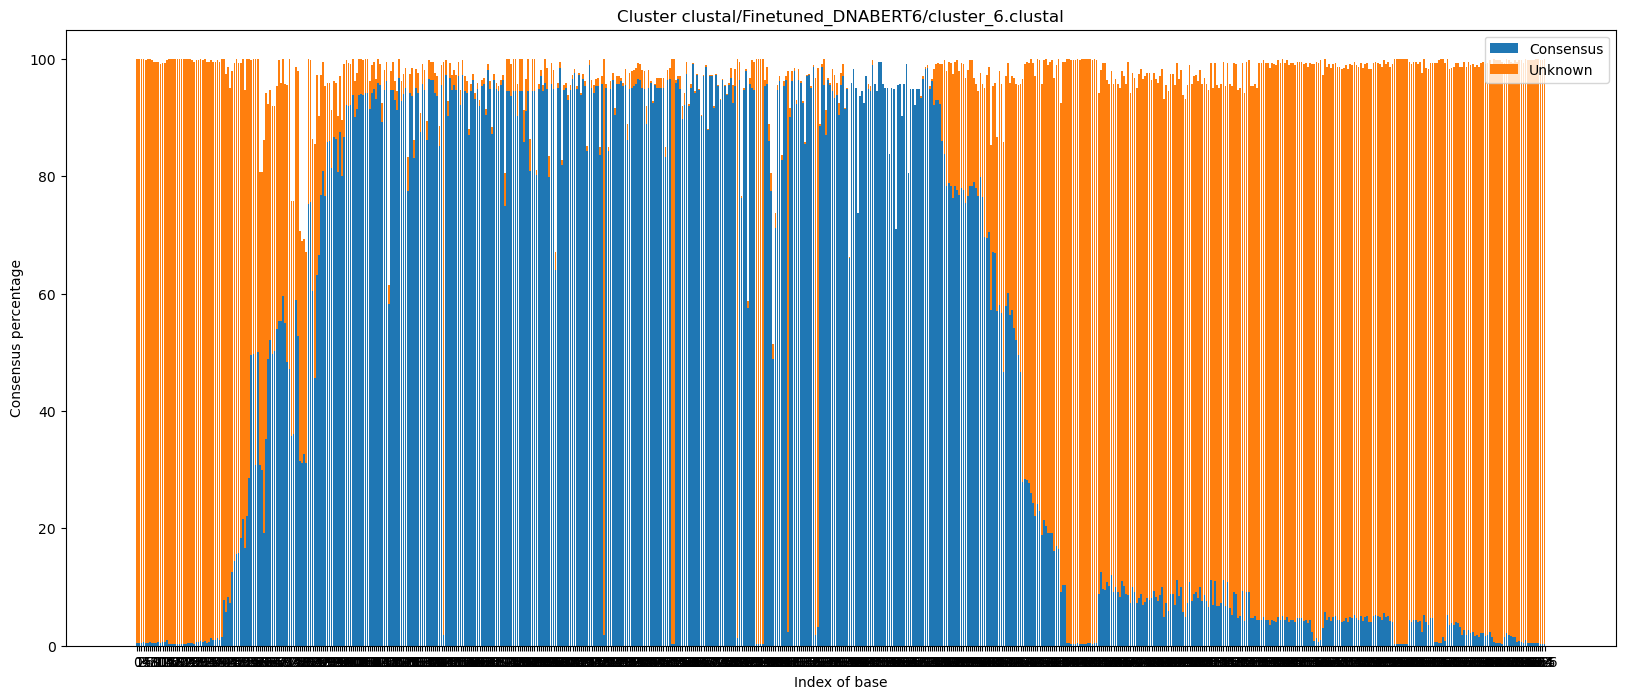

Plot for cluster 7


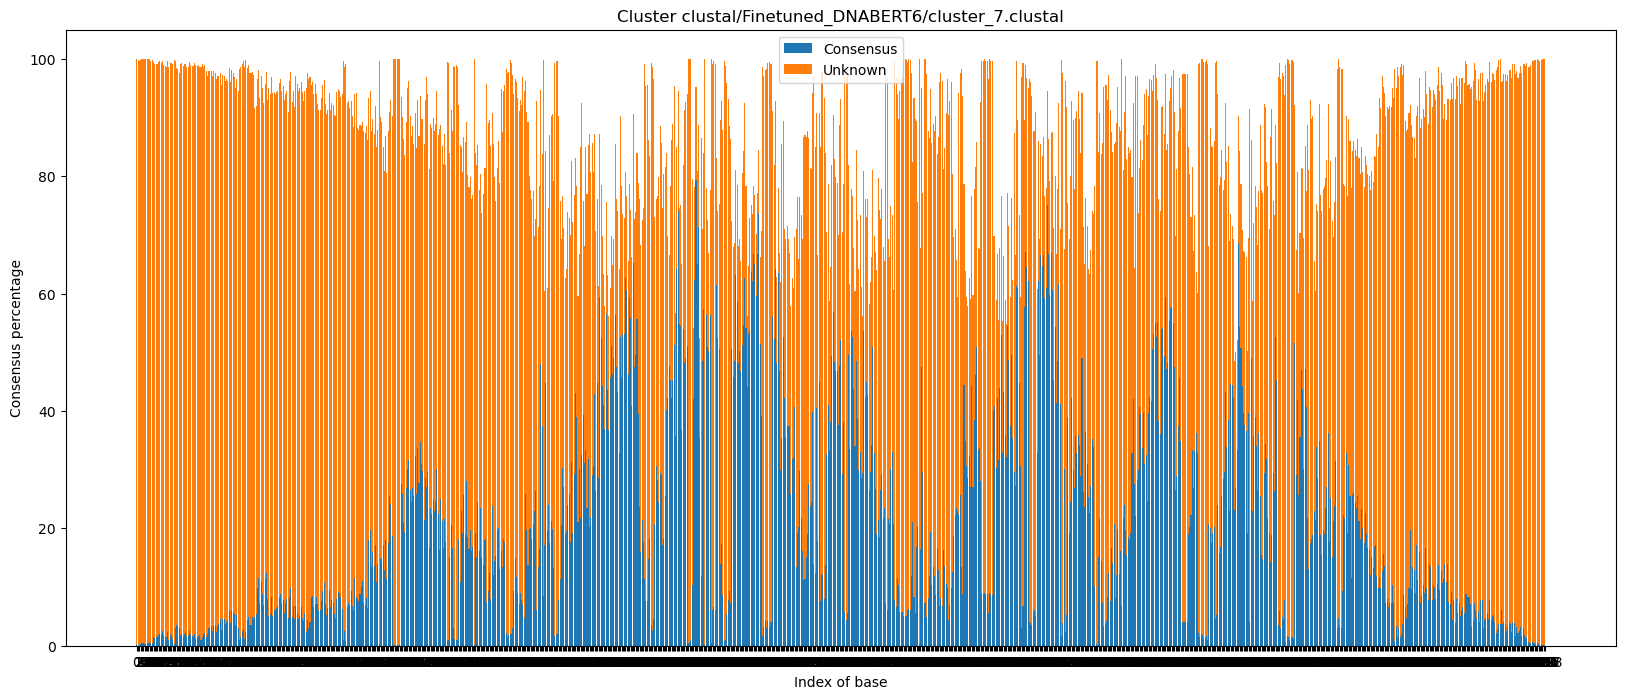

Plot for cluster 8


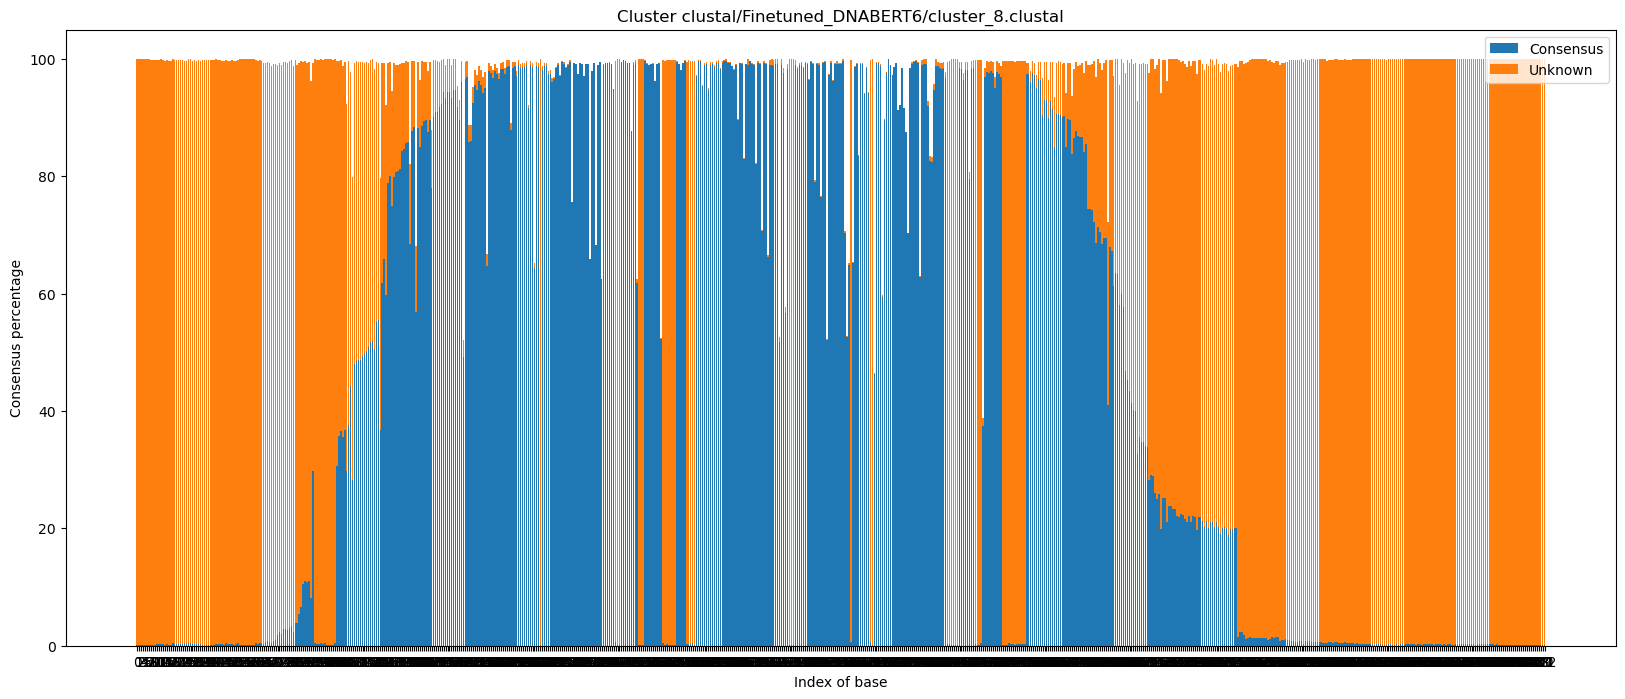

Plot for cluster 9


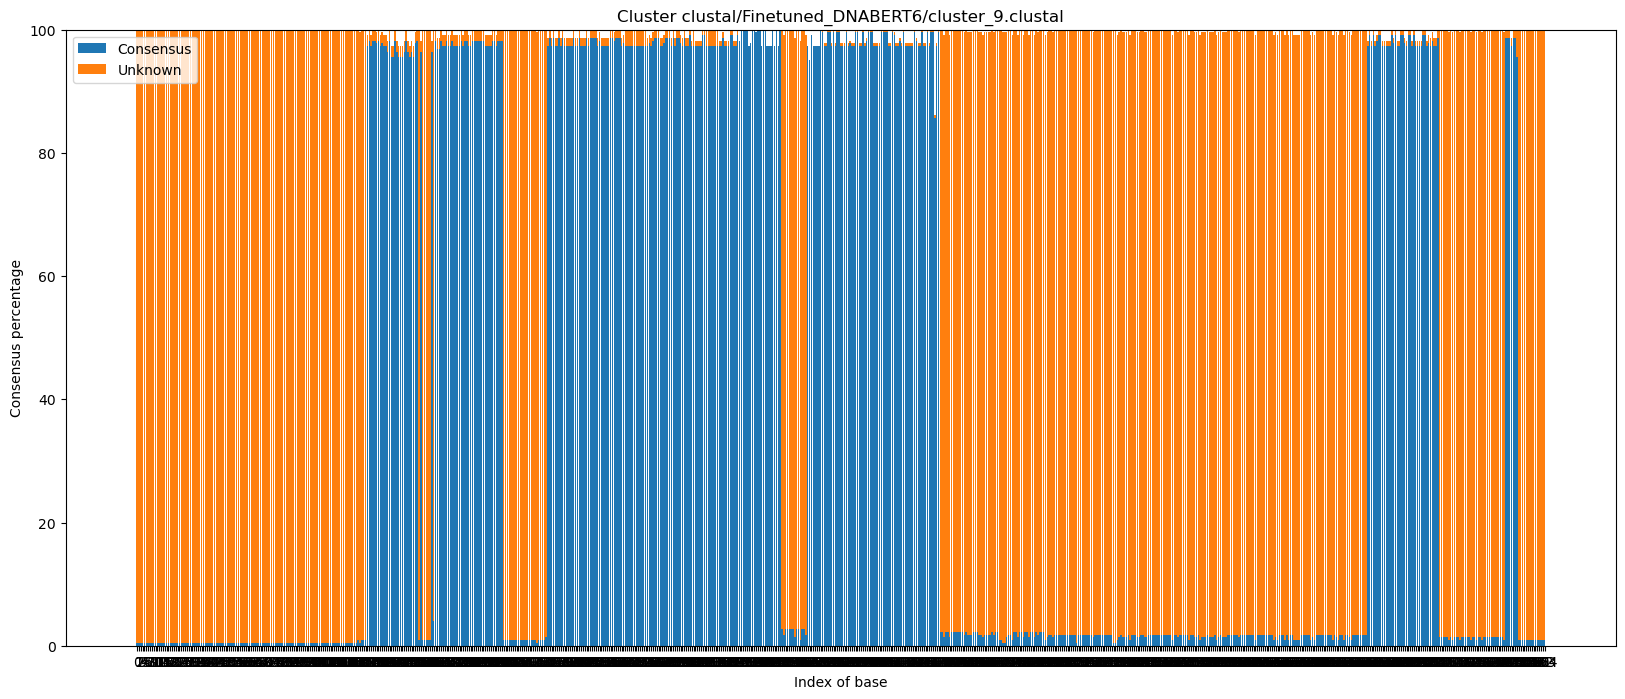

Plot for cluster 10


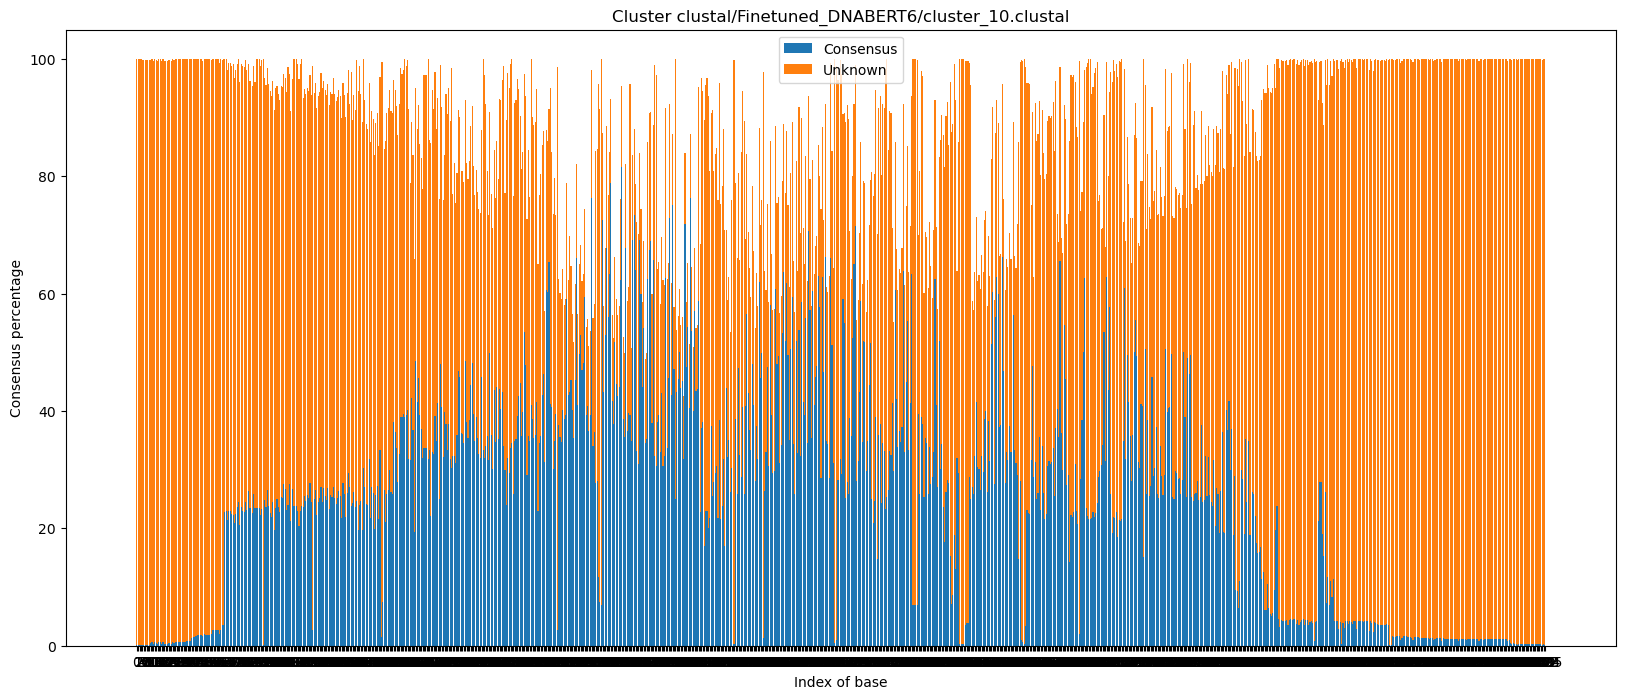

Plot for cluster 11


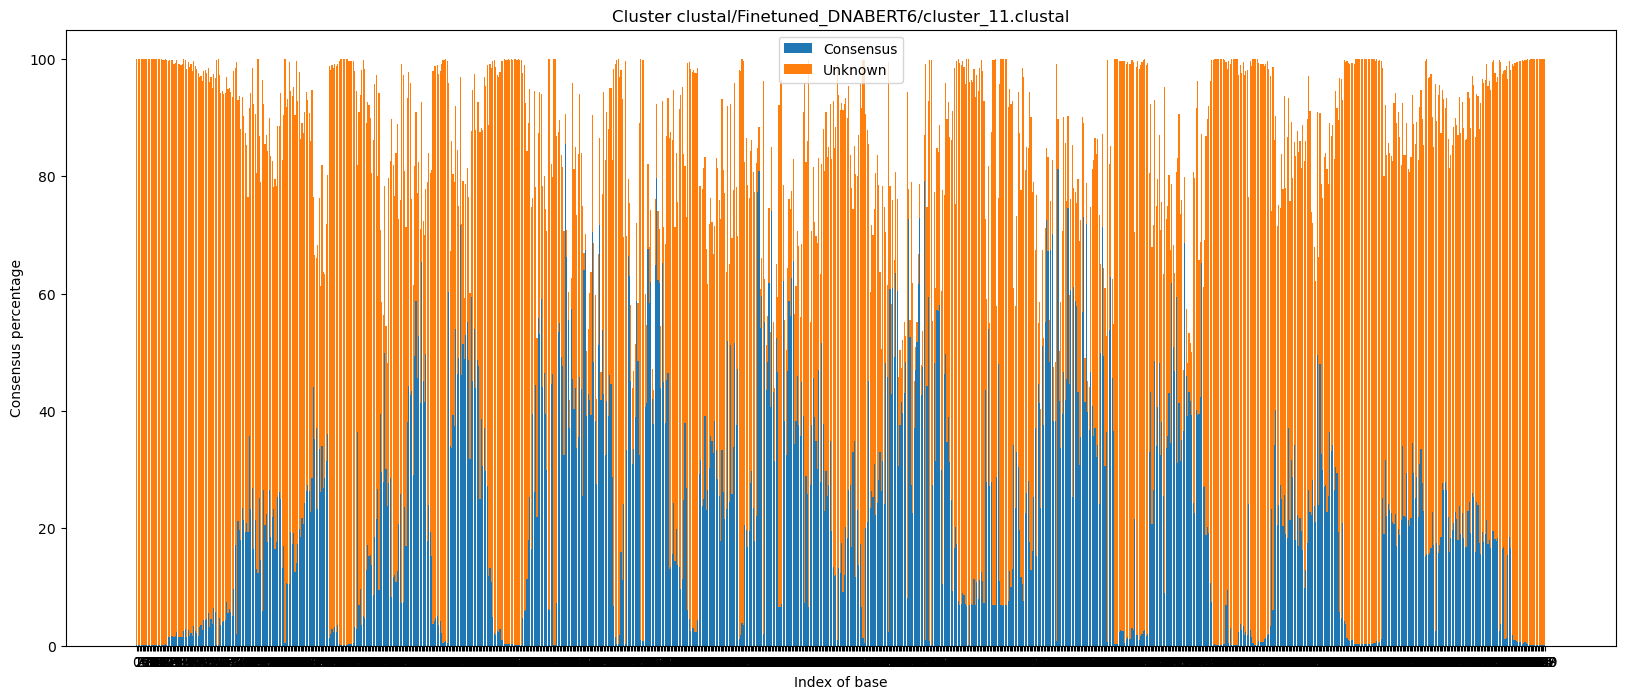

Plot for cluster 12


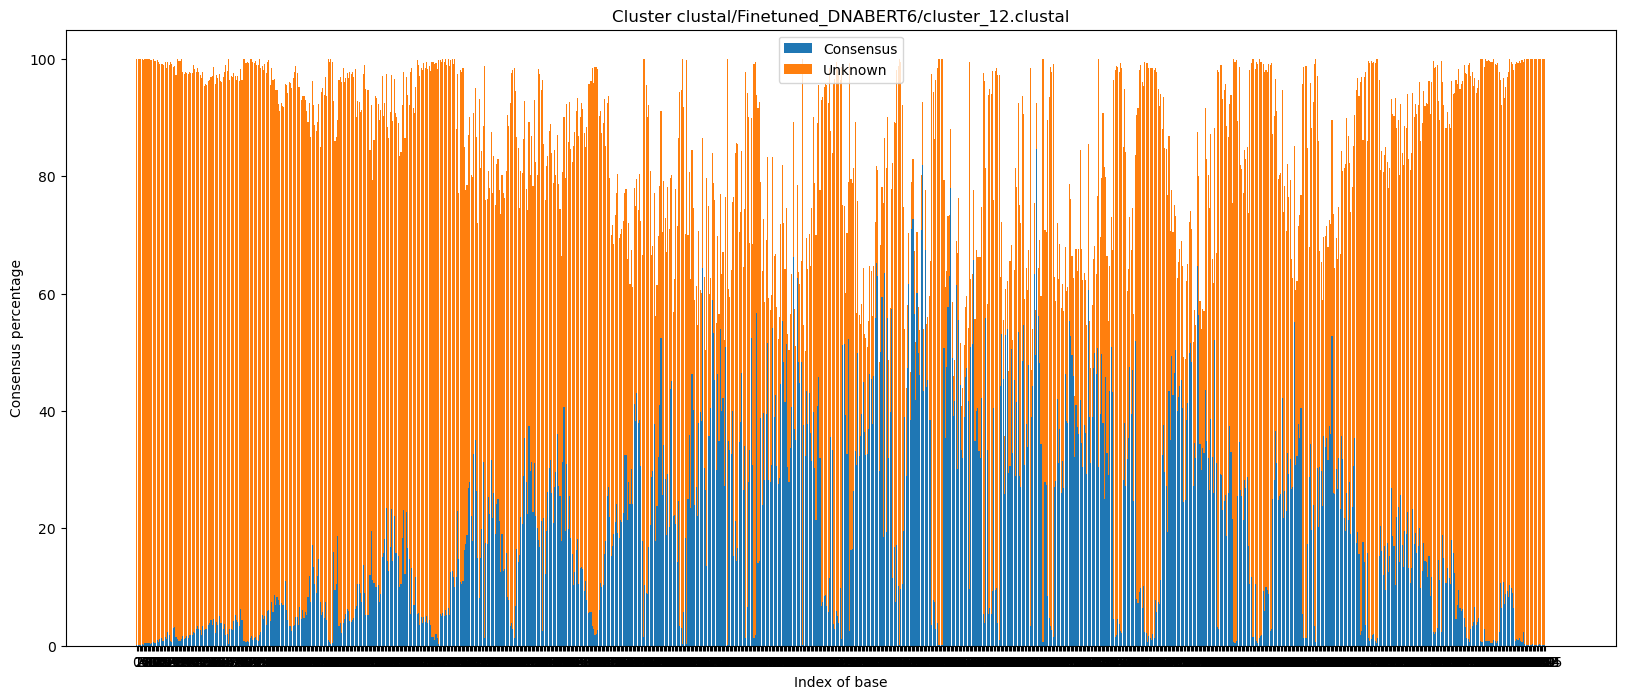

Plot for cluster 13


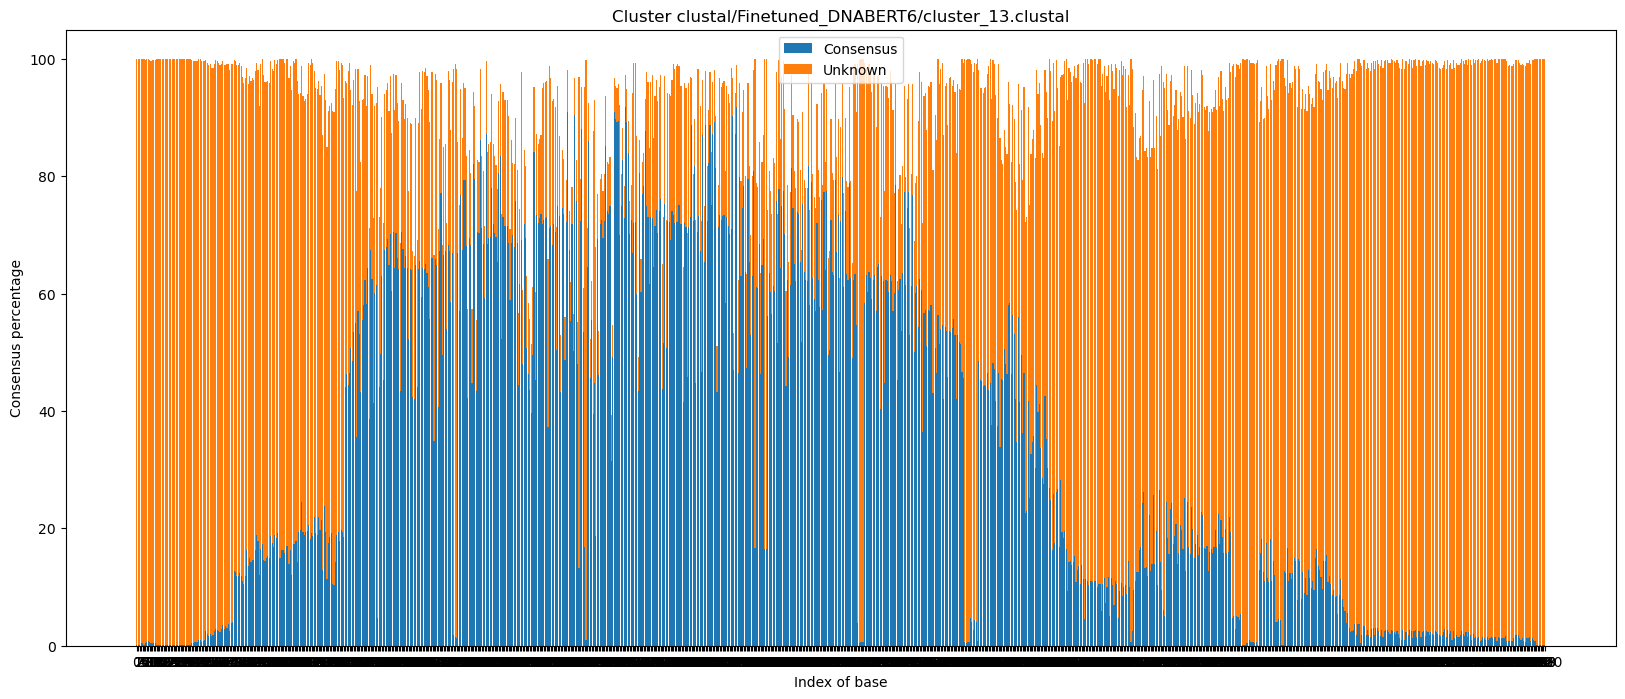

Plot for cluster 14


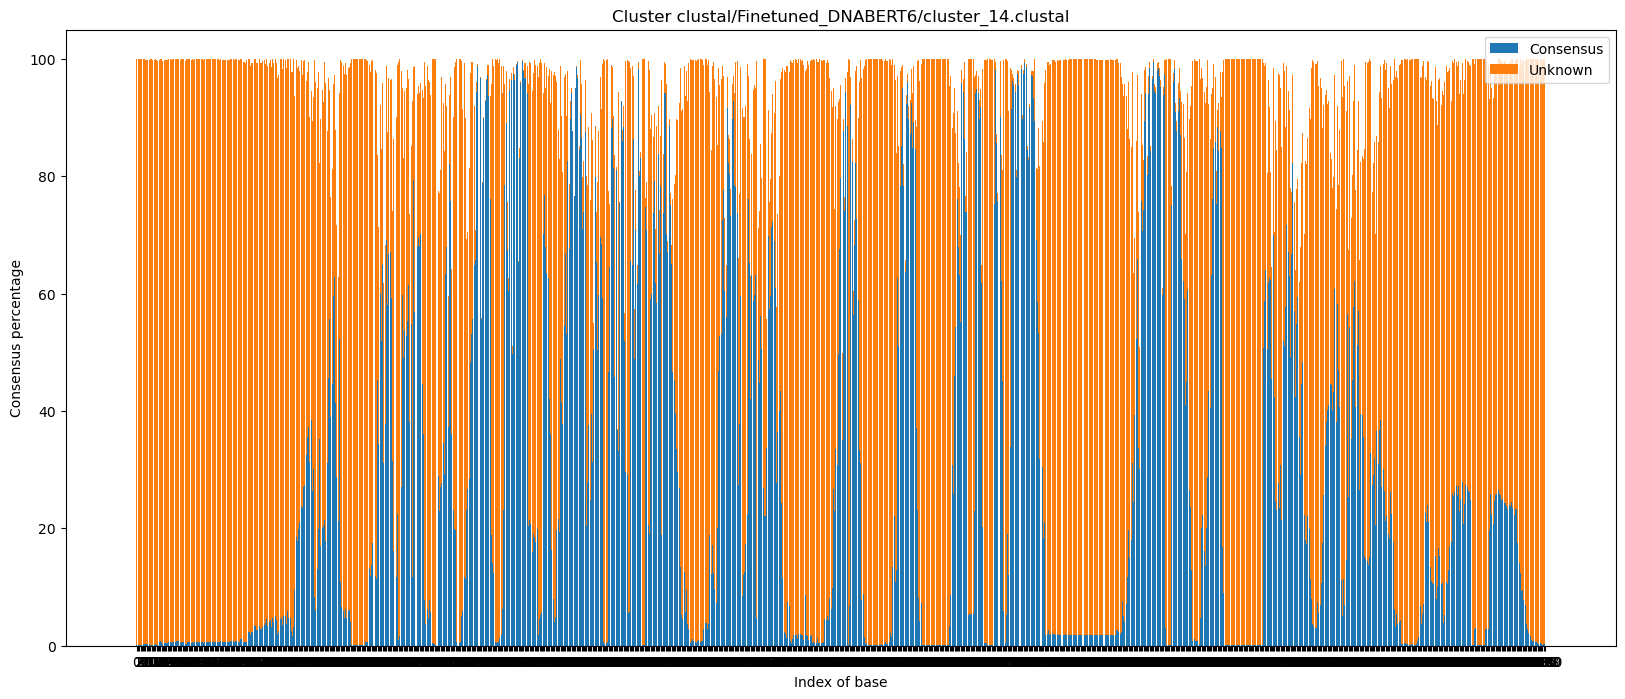

Plot for cluster 15


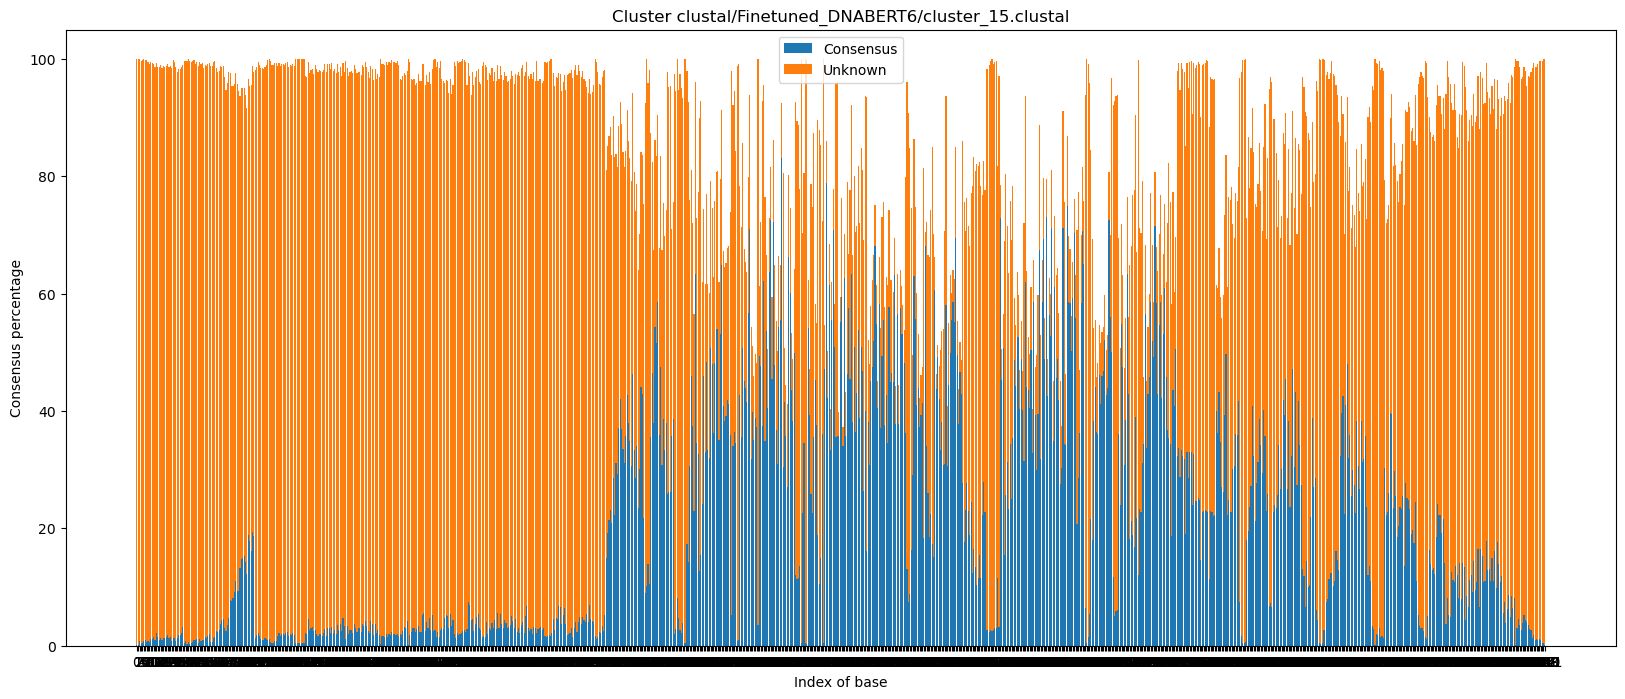

Plot for cluster 16


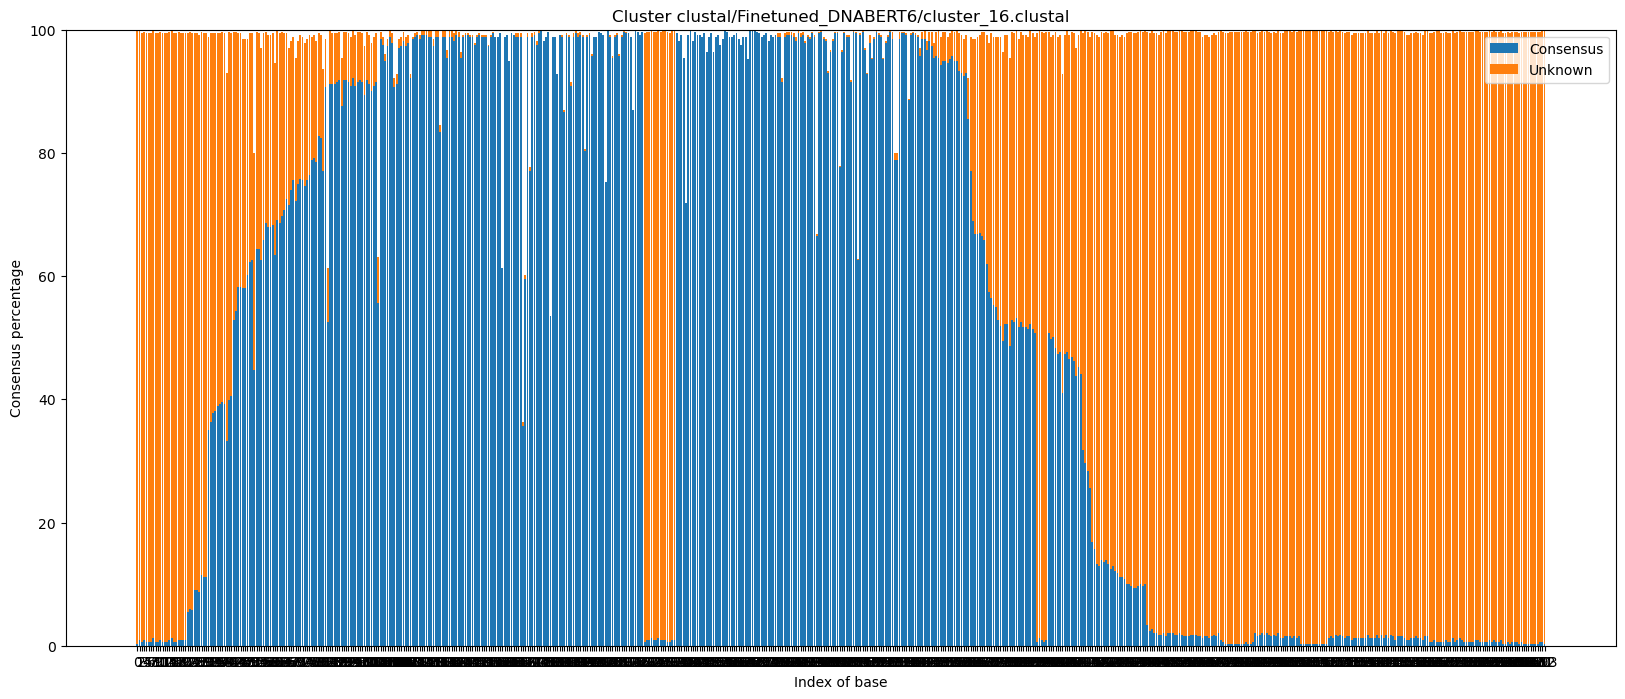

Plot for cluster 17


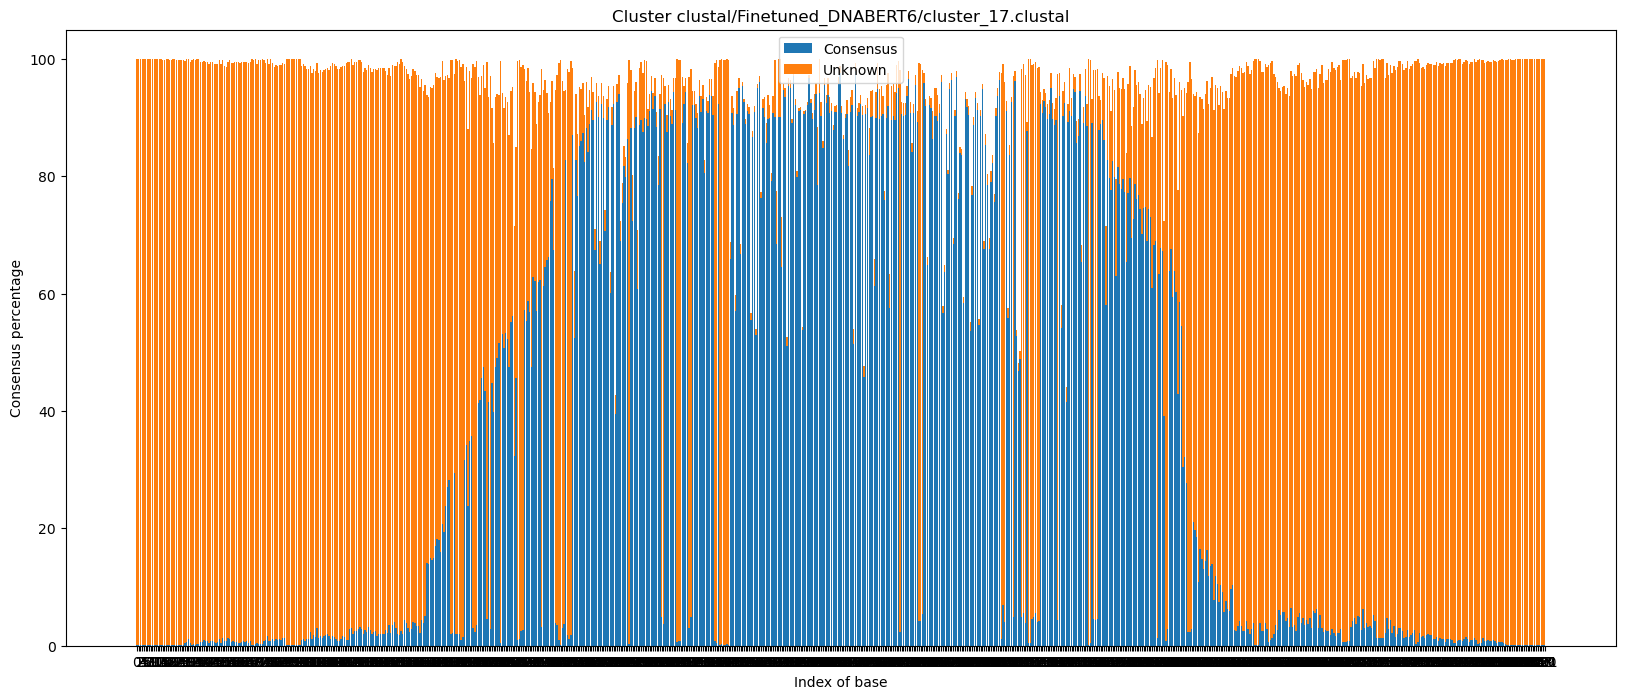

Plot for cluster 18


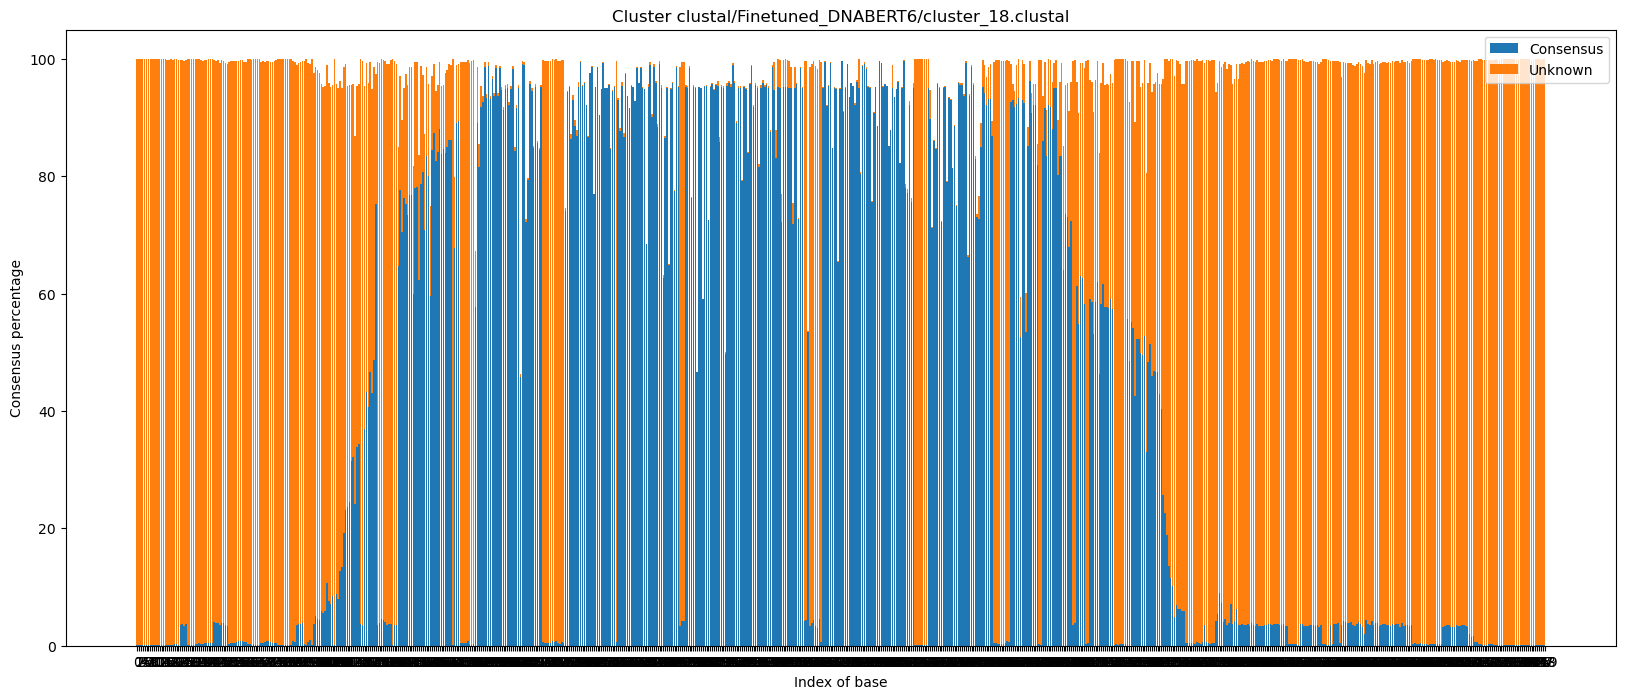

Plot for cluster 19


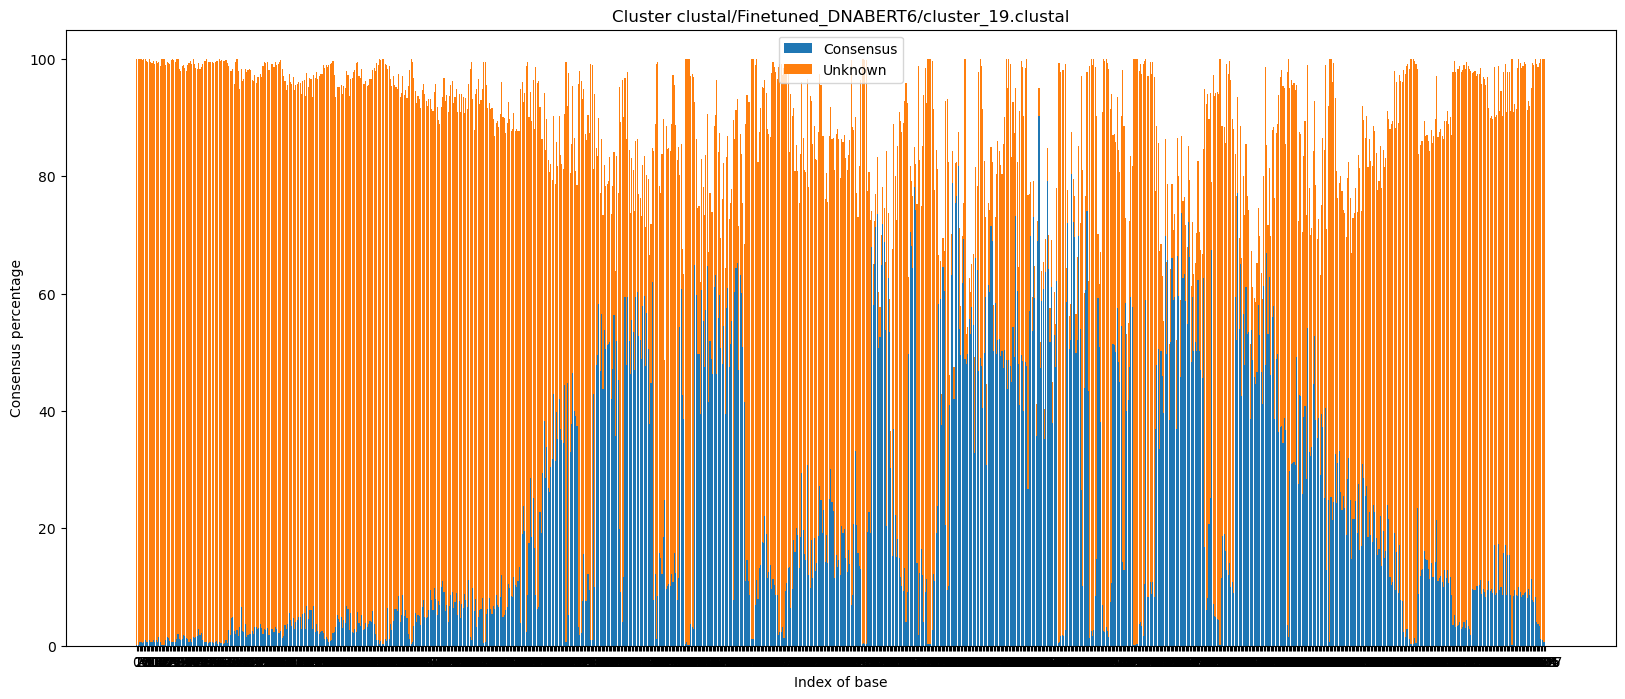

Plot for cluster 20


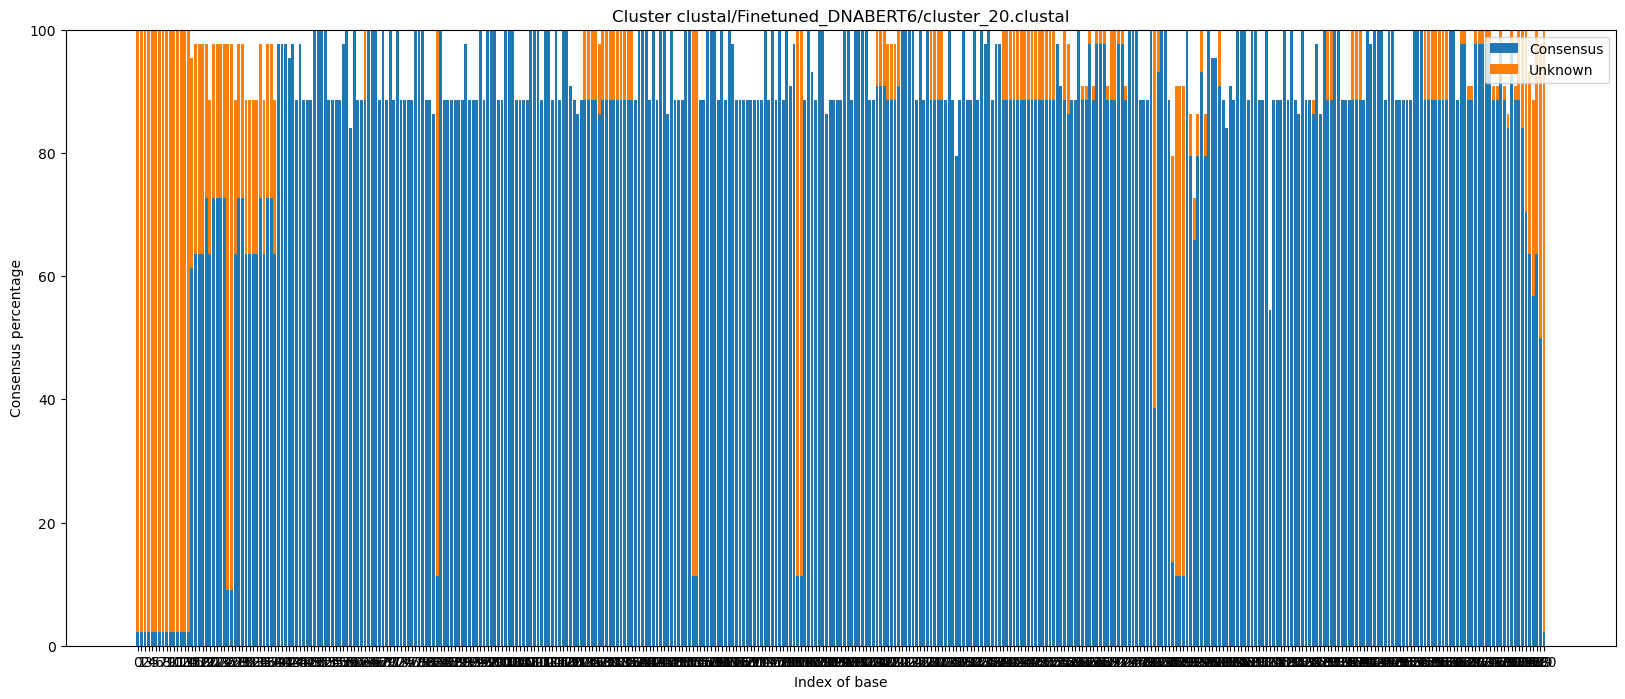

Plot for cluster 21


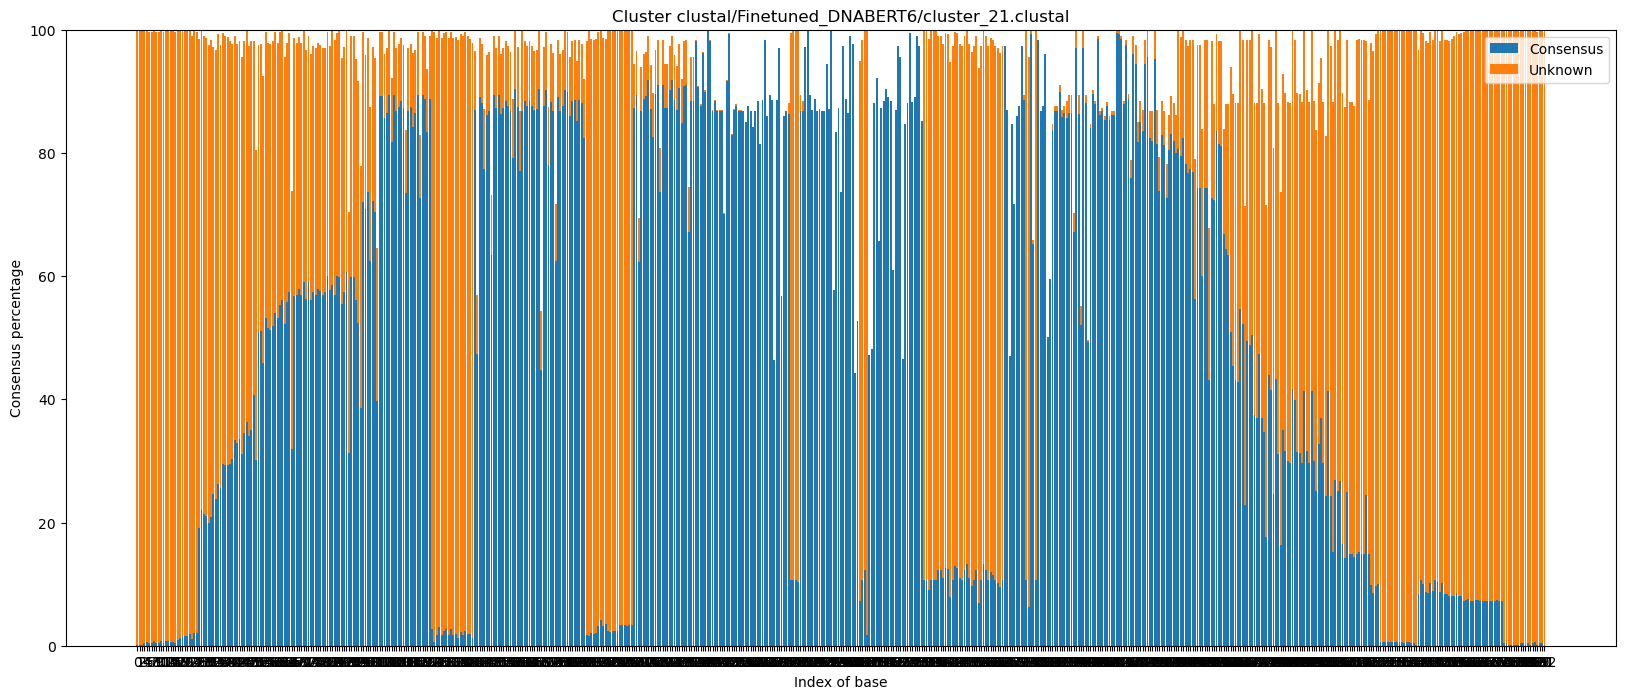

Plot for cluster 22


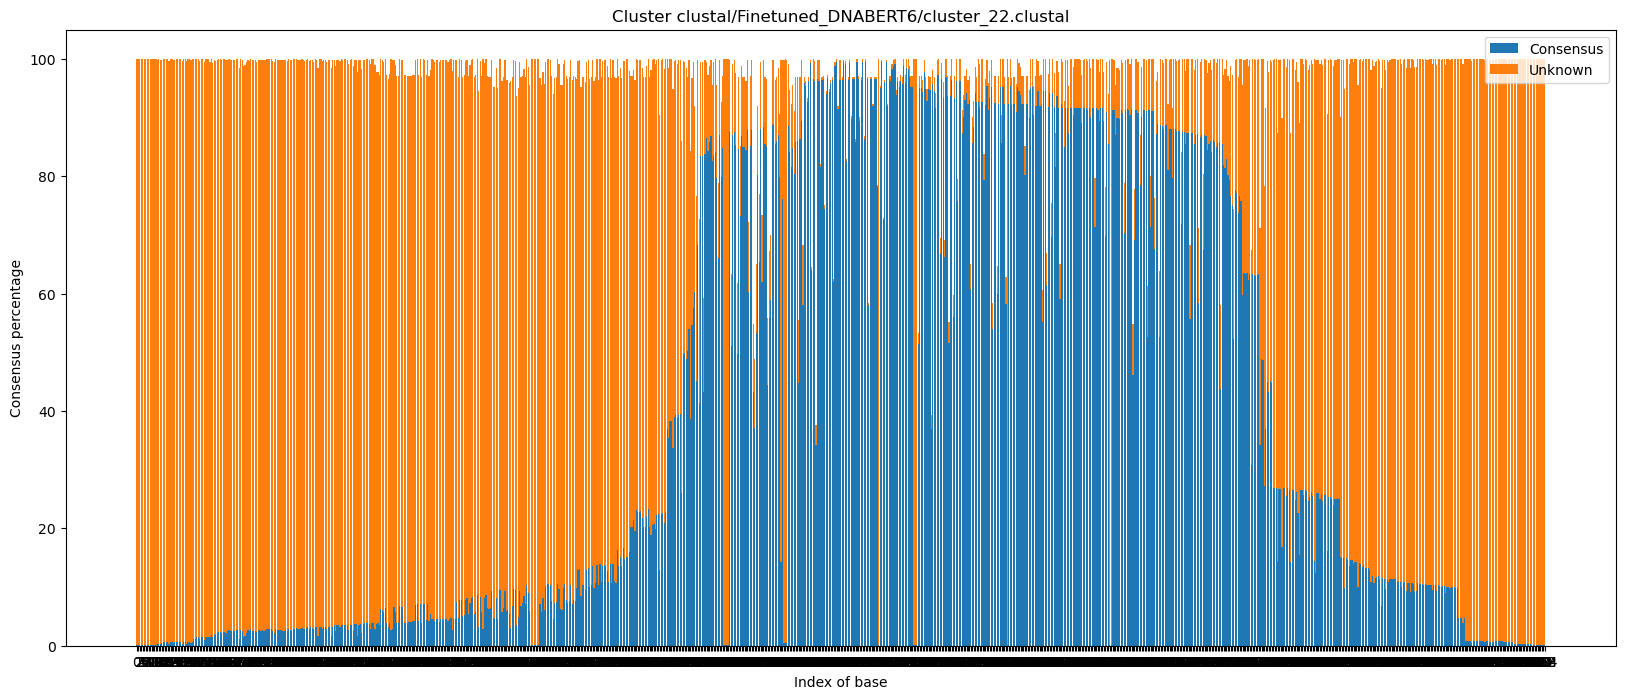

Plot for cluster 23


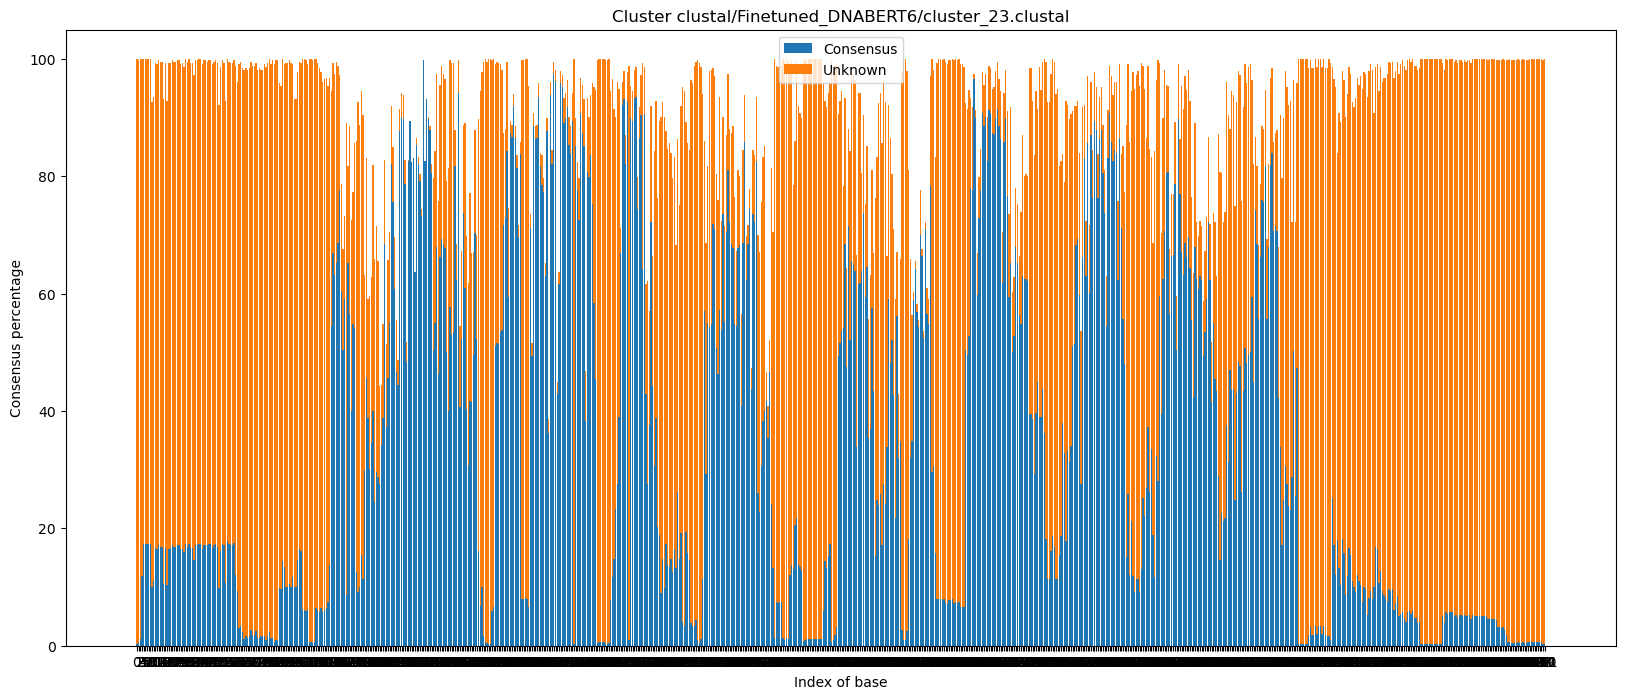

Plot for cluster 24


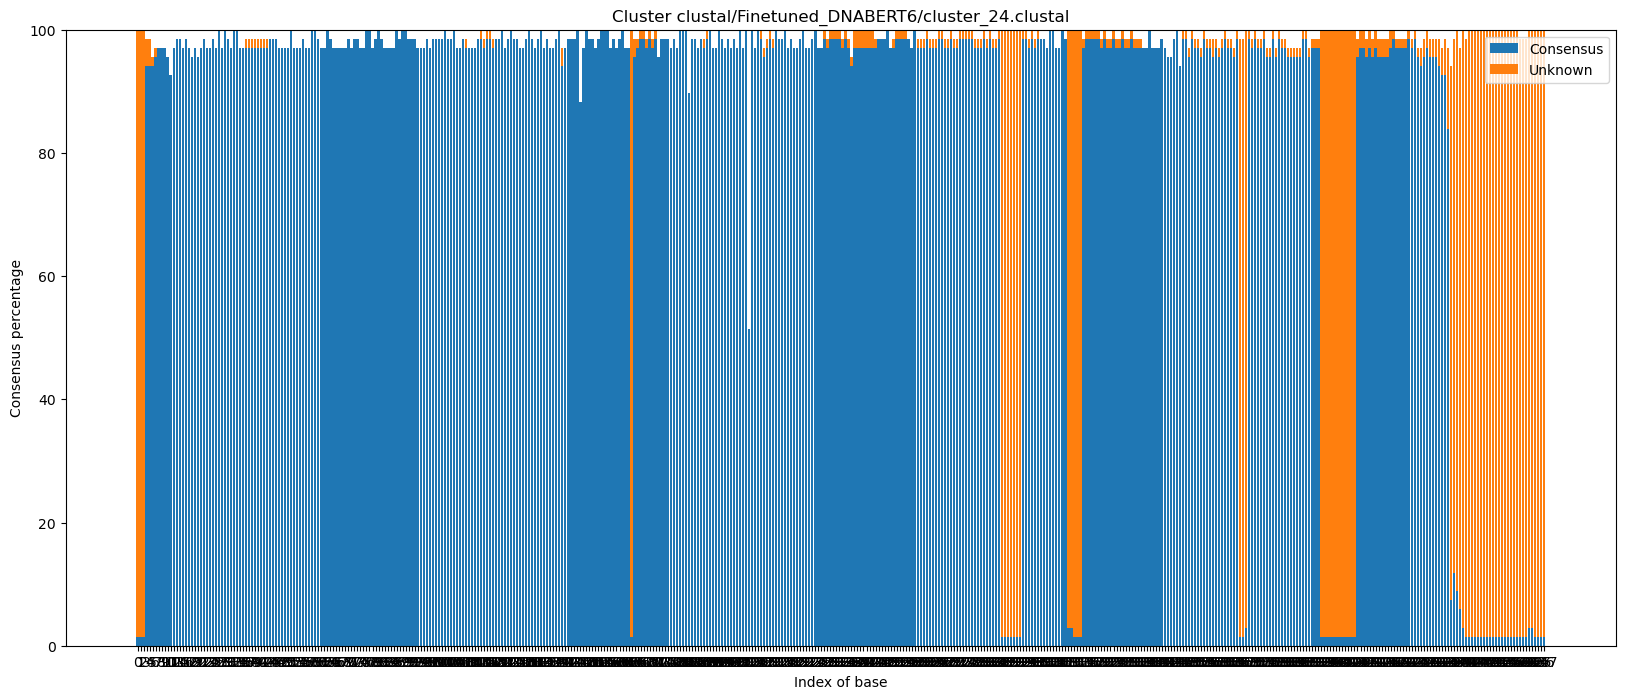

Plot for cluster 25


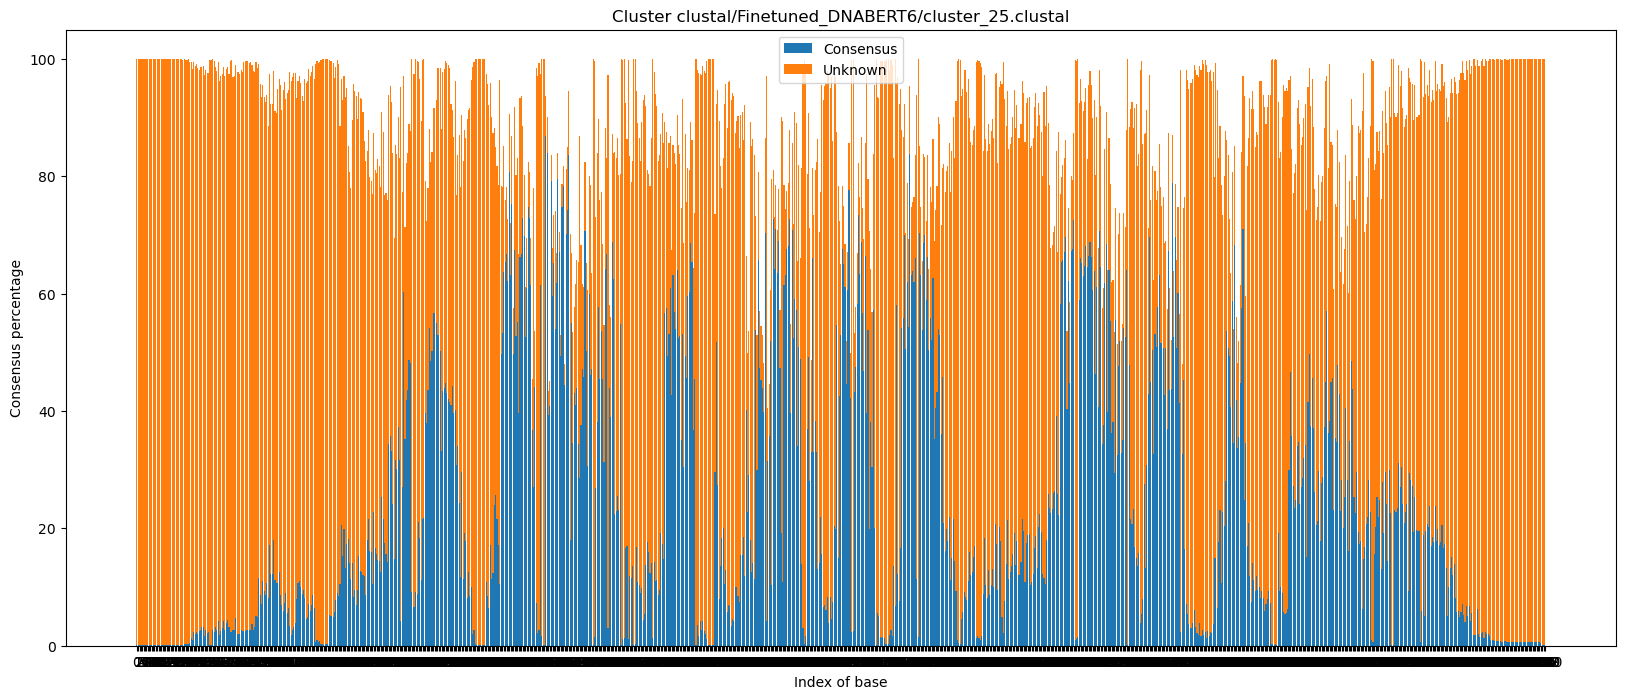

Plot for cluster 26


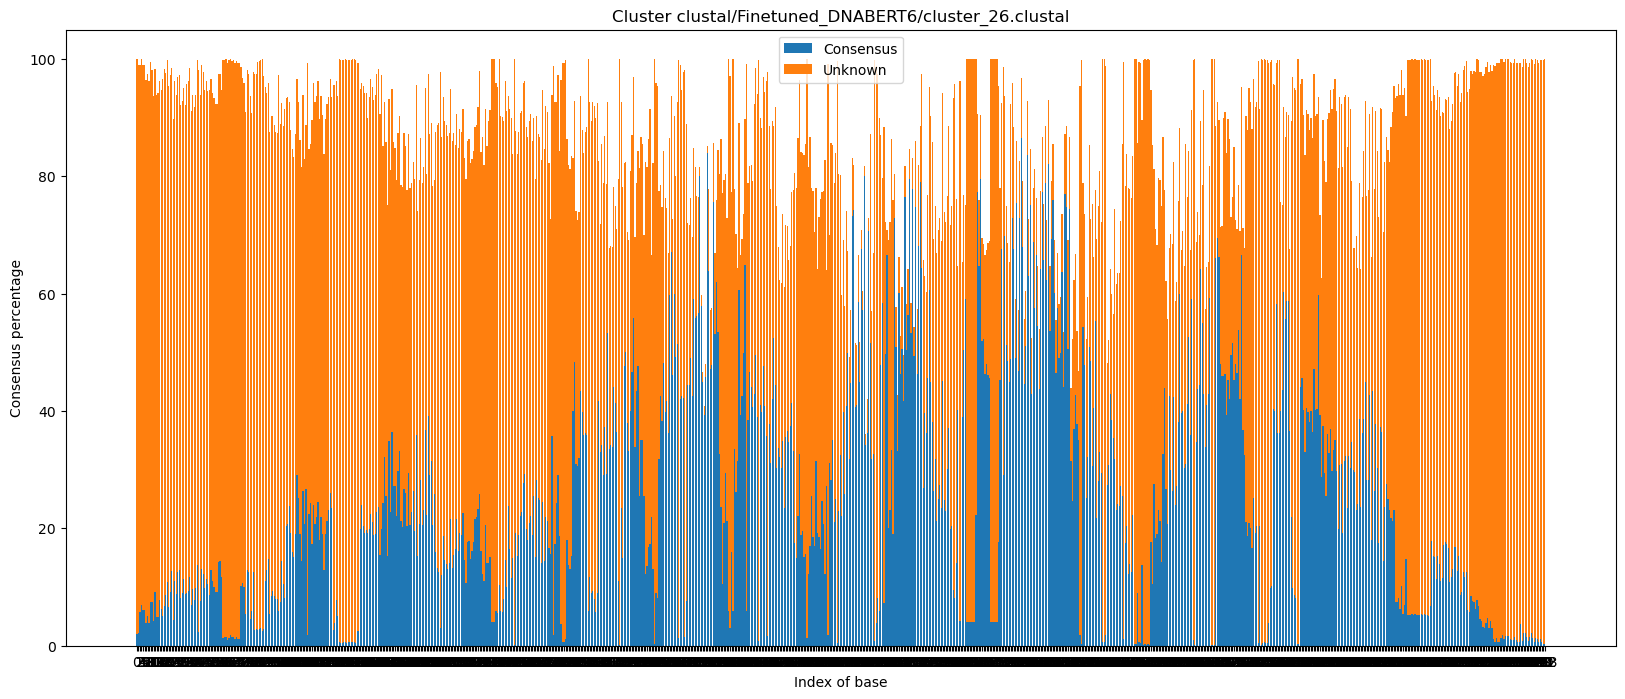

Plot for cluster 27


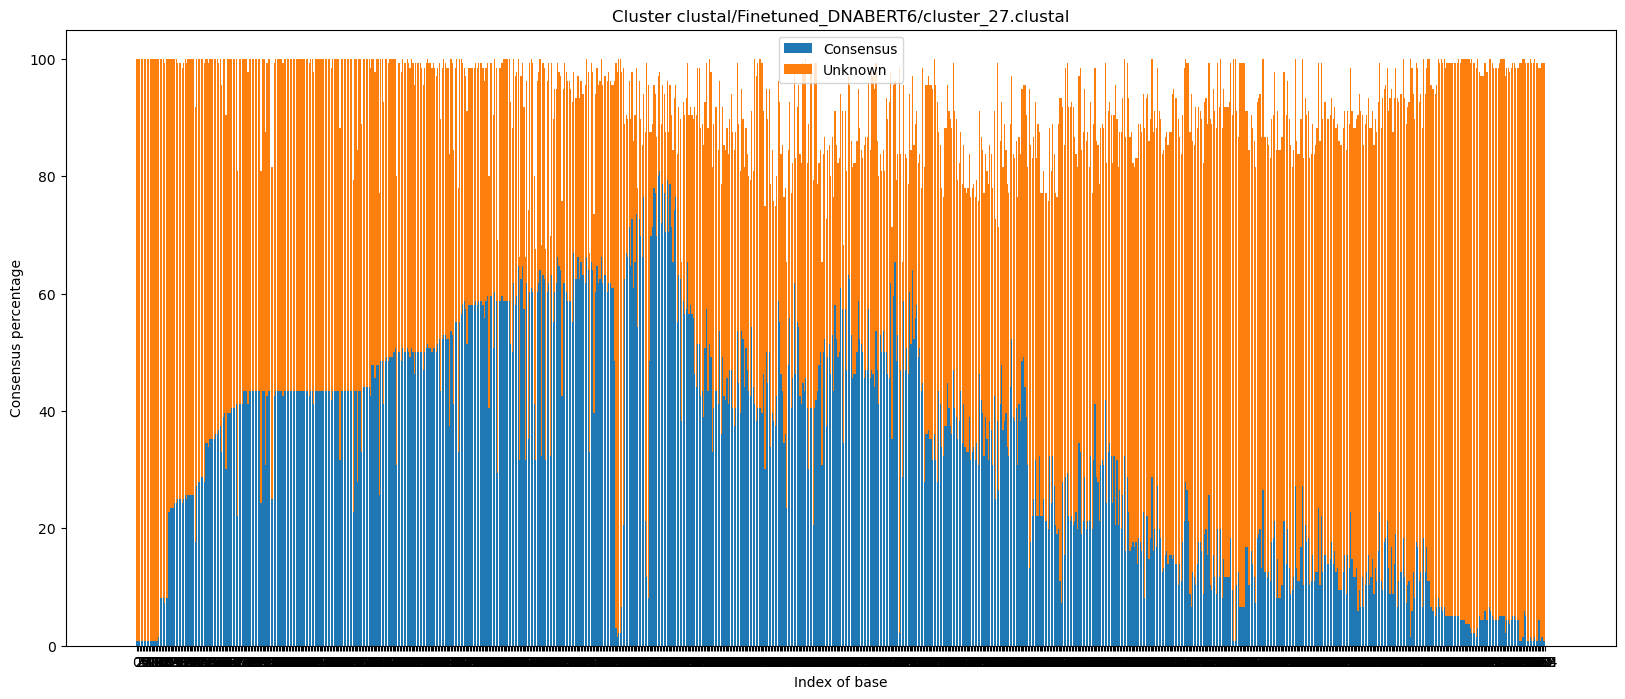

Plot for cluster 28


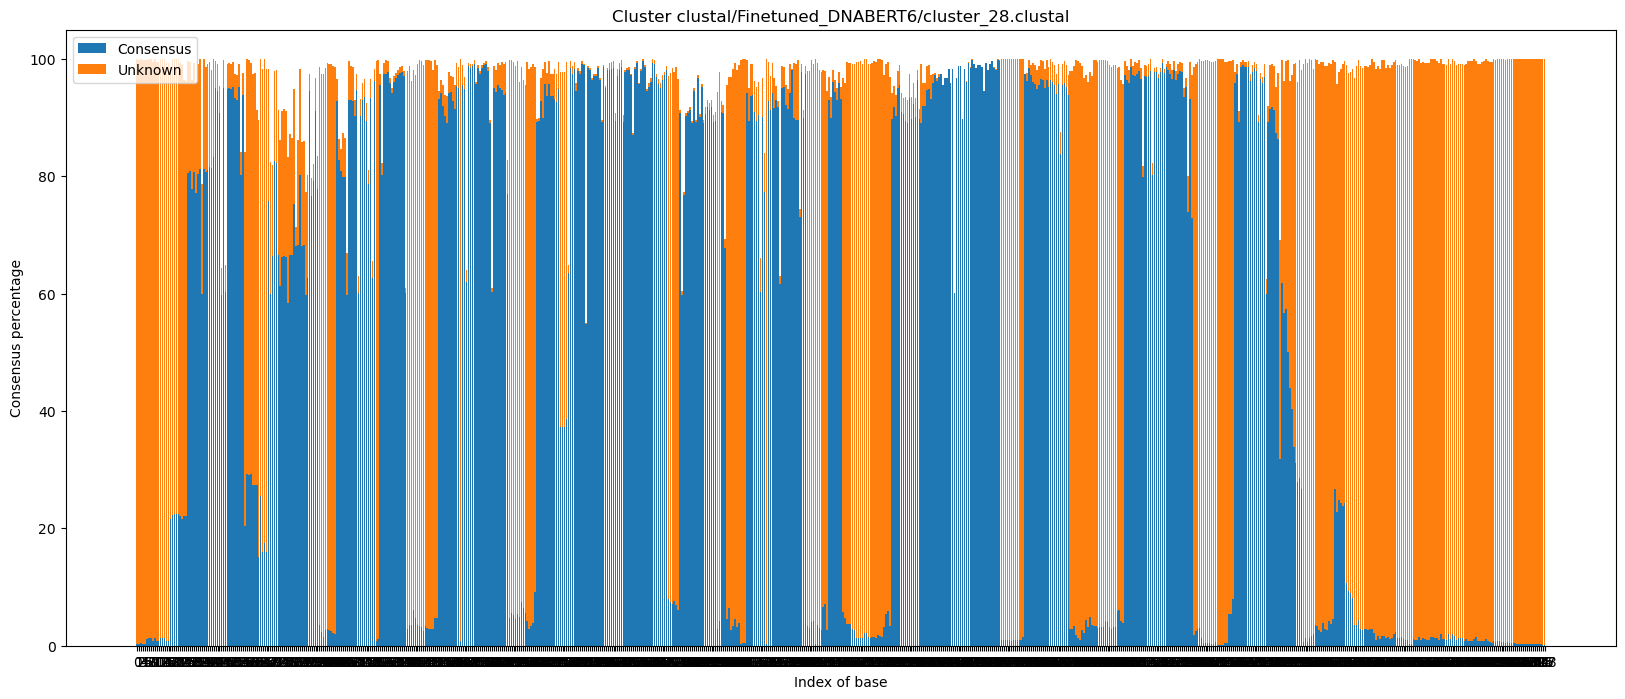

Plot for cluster 29


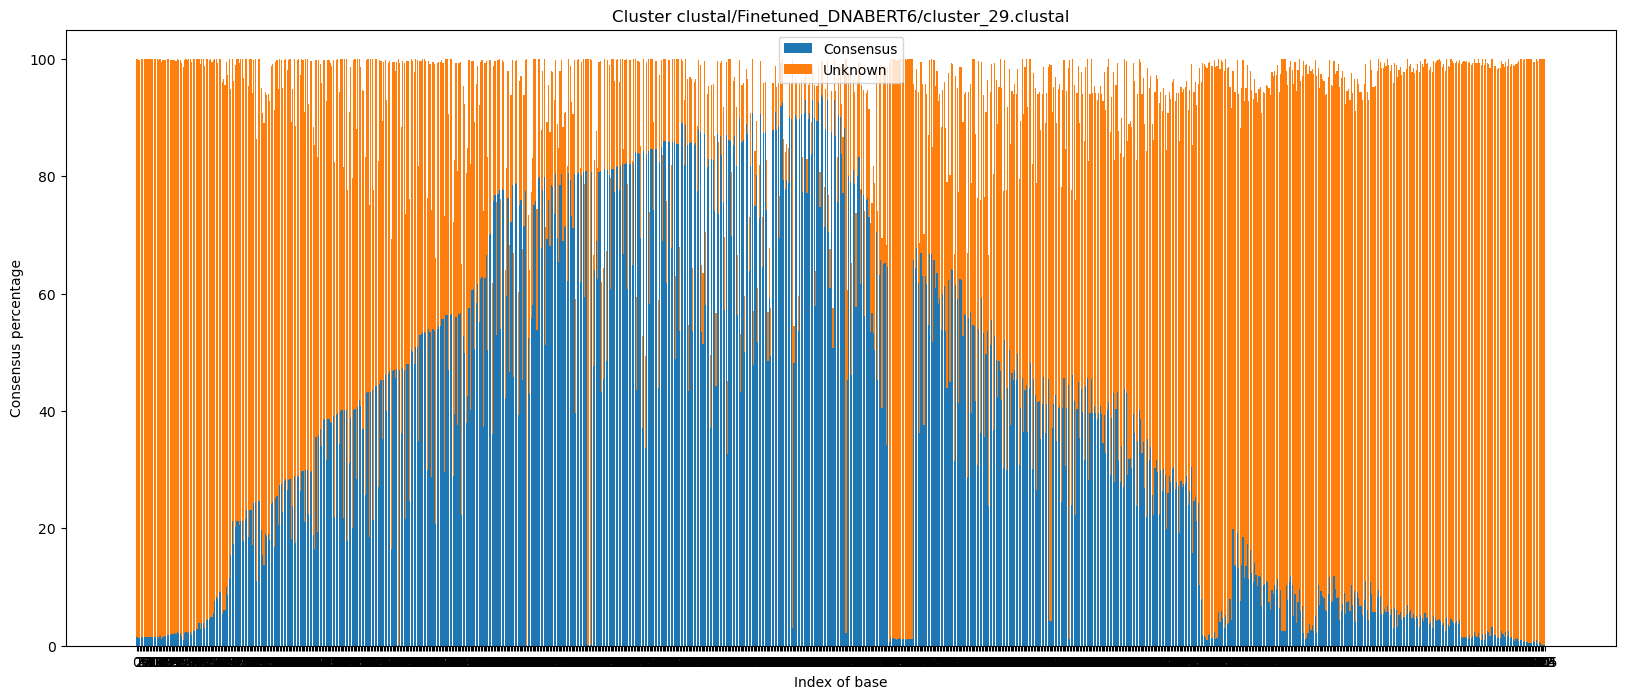

Plot for cluster 30


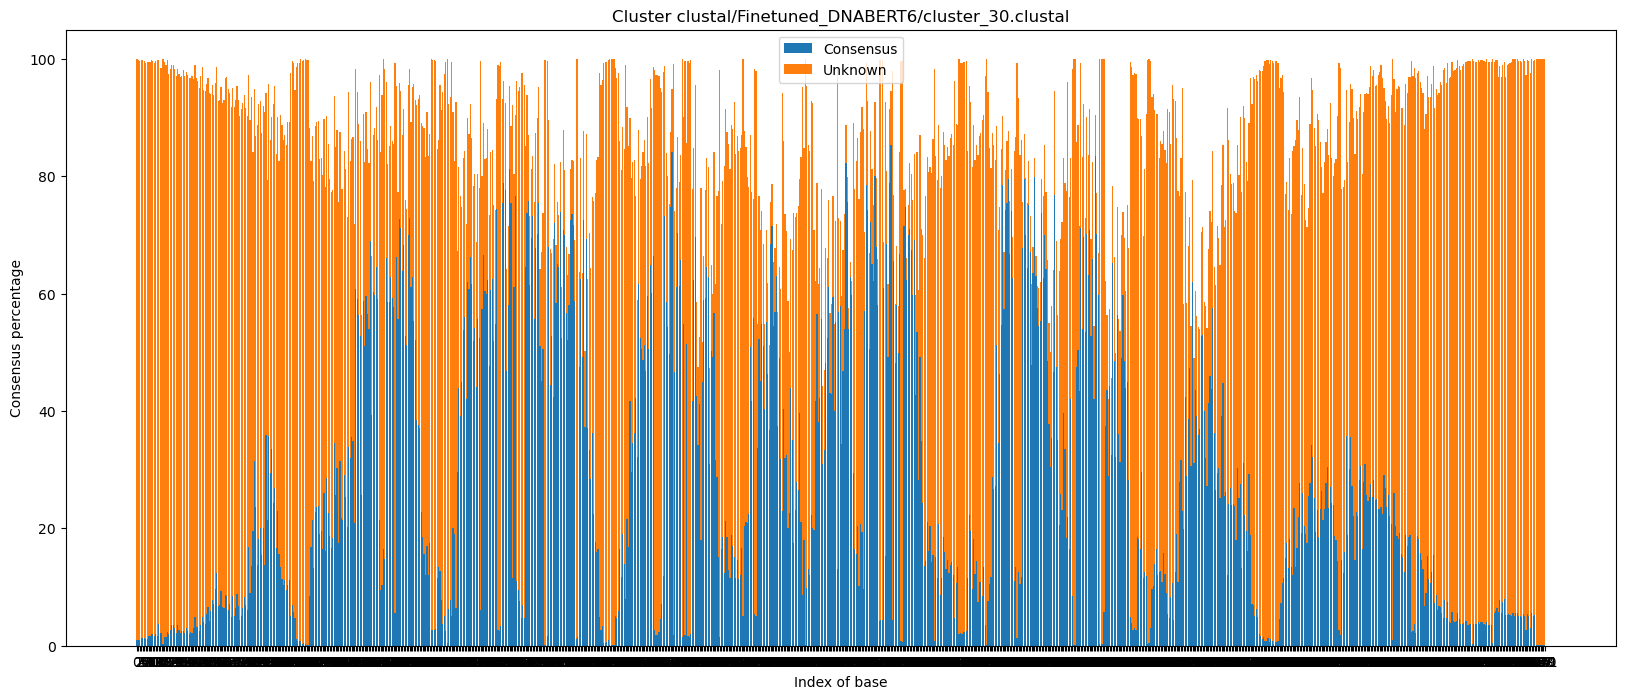

Plot for cluster 31


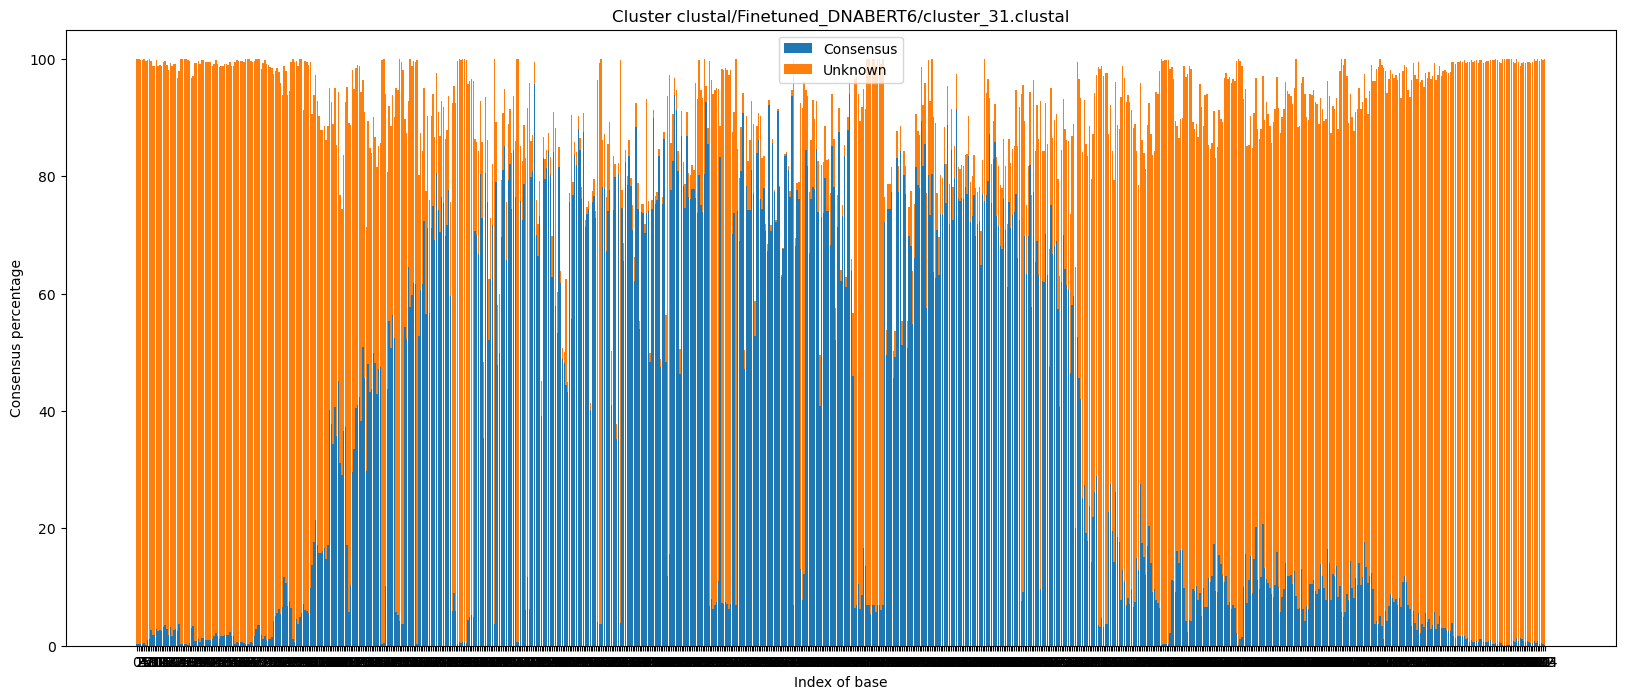

Plot for cluster 32


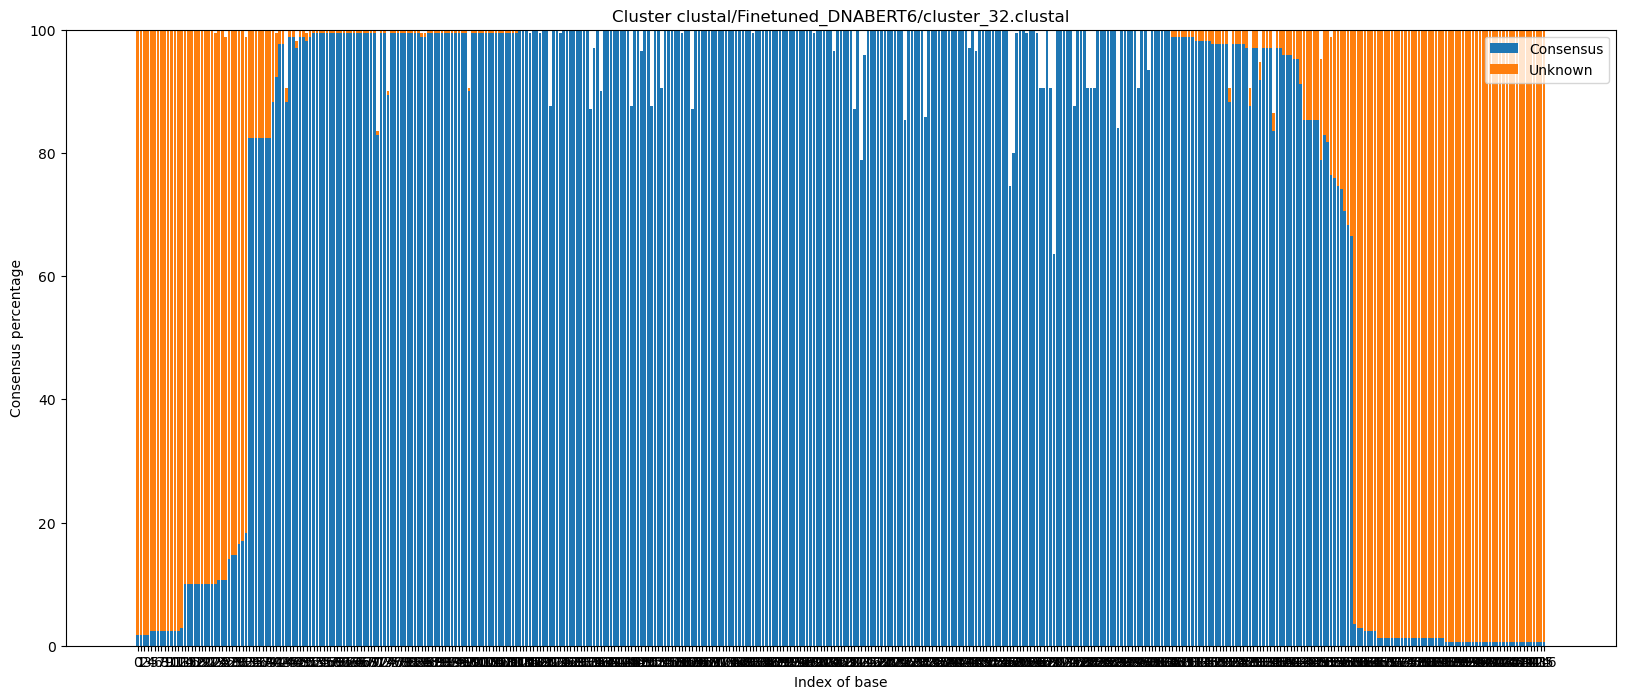

Plot for cluster 33


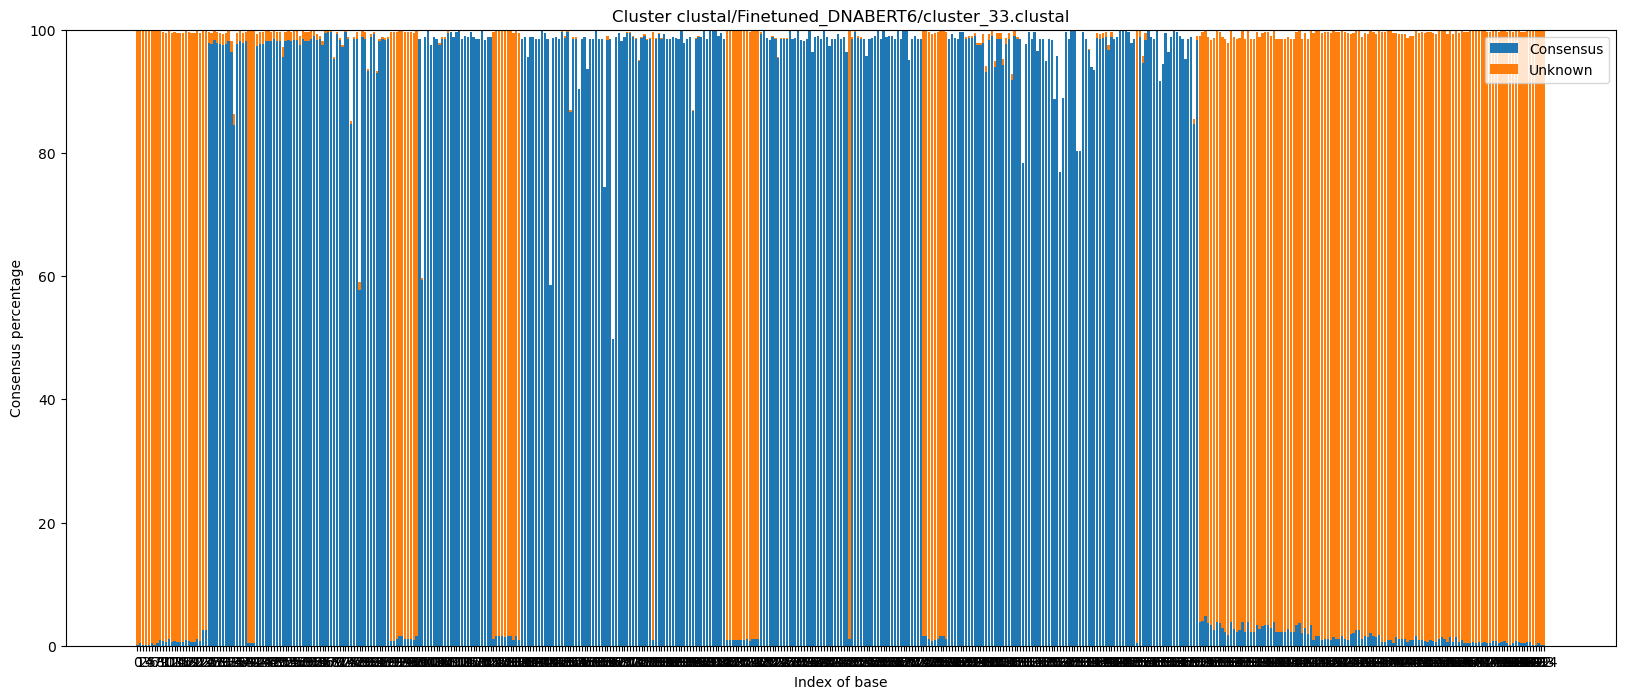

Plot for cluster 34


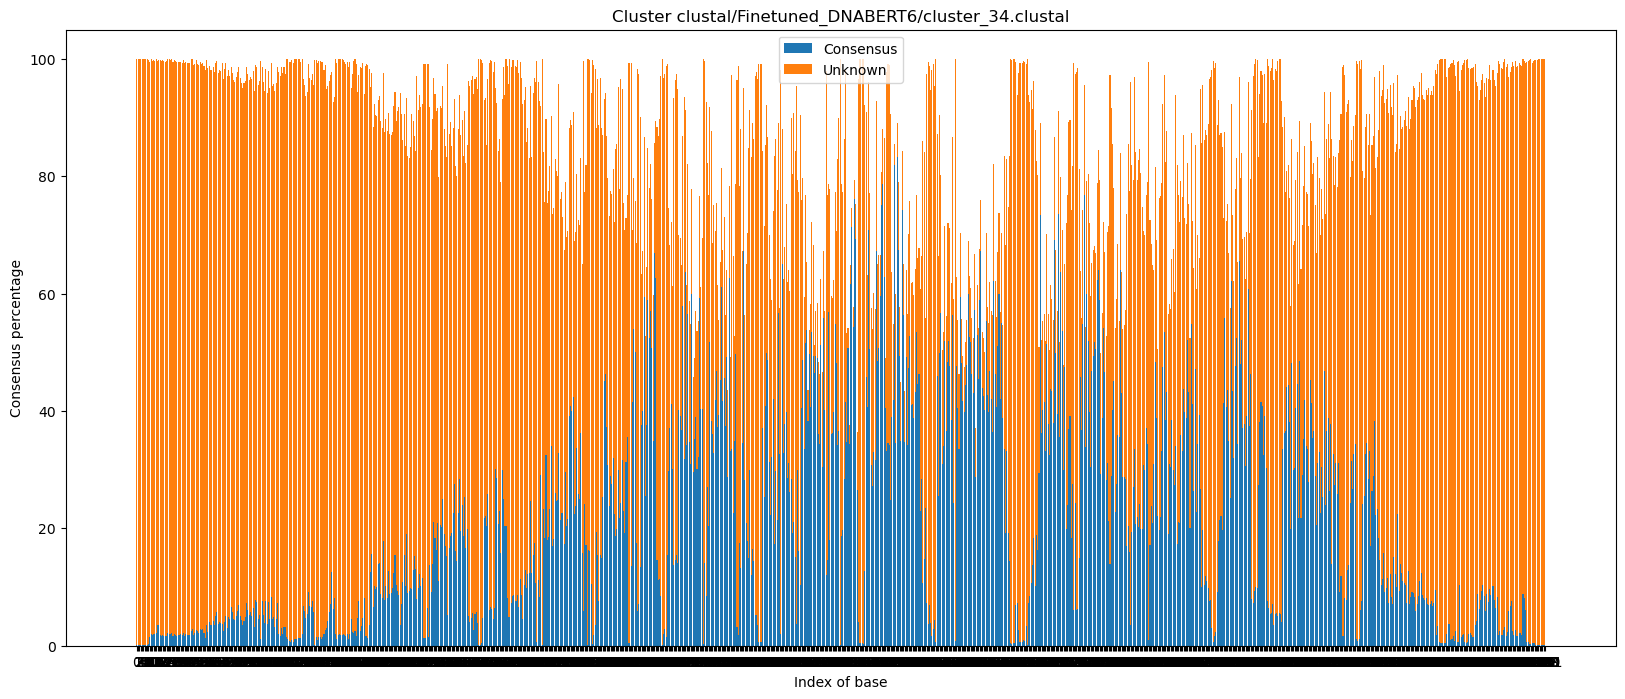

Plot for cluster 35


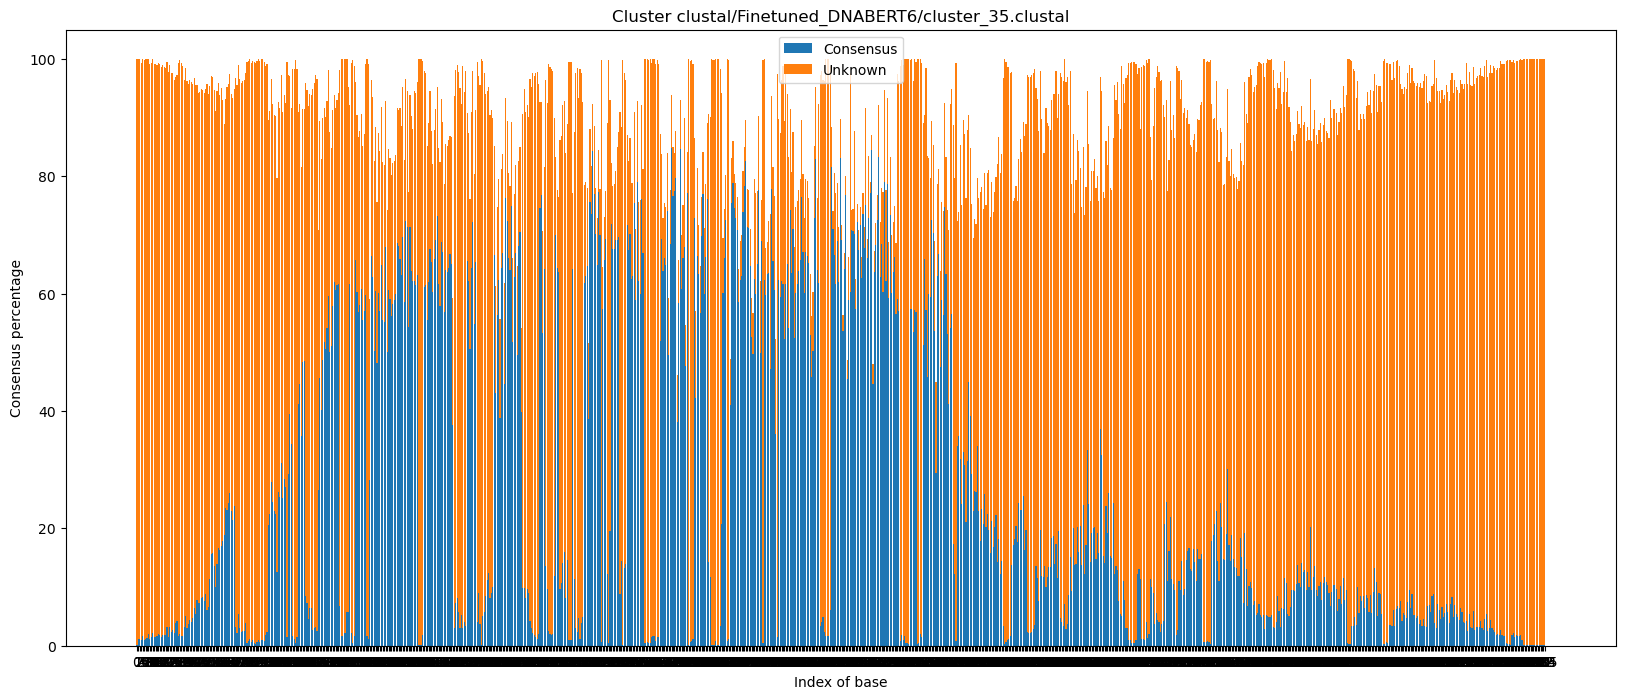

Plot for cluster 36


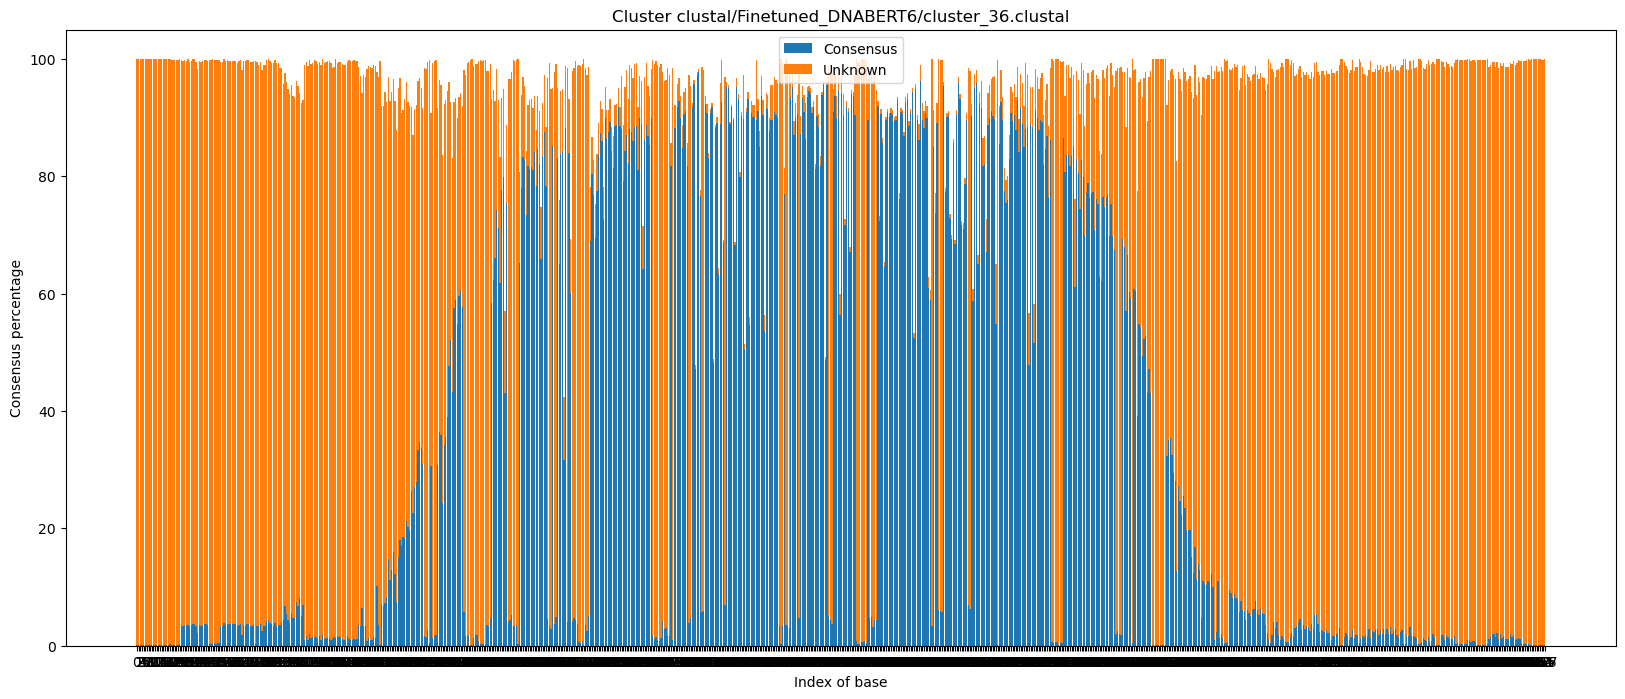

Plot for cluster 37


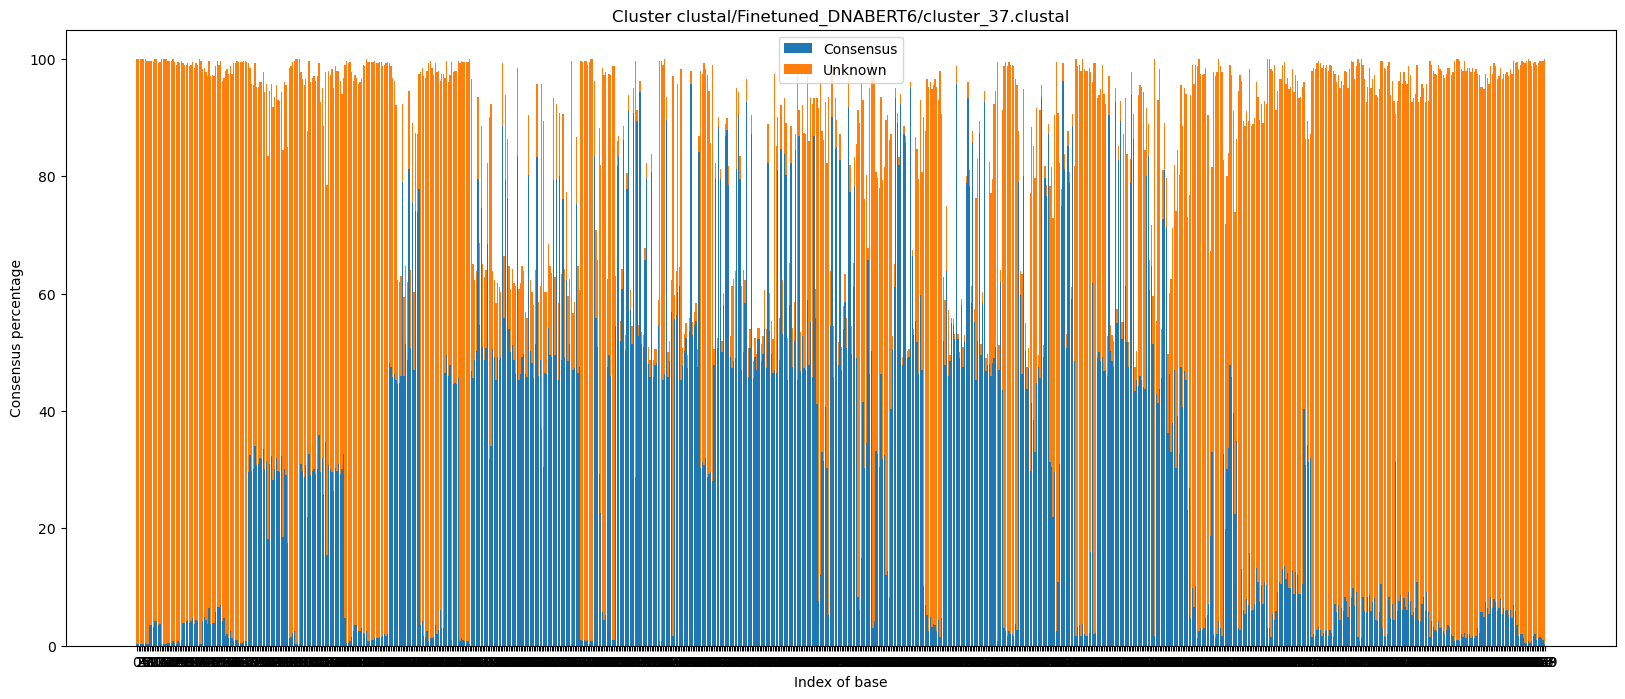

Plot for cluster 38


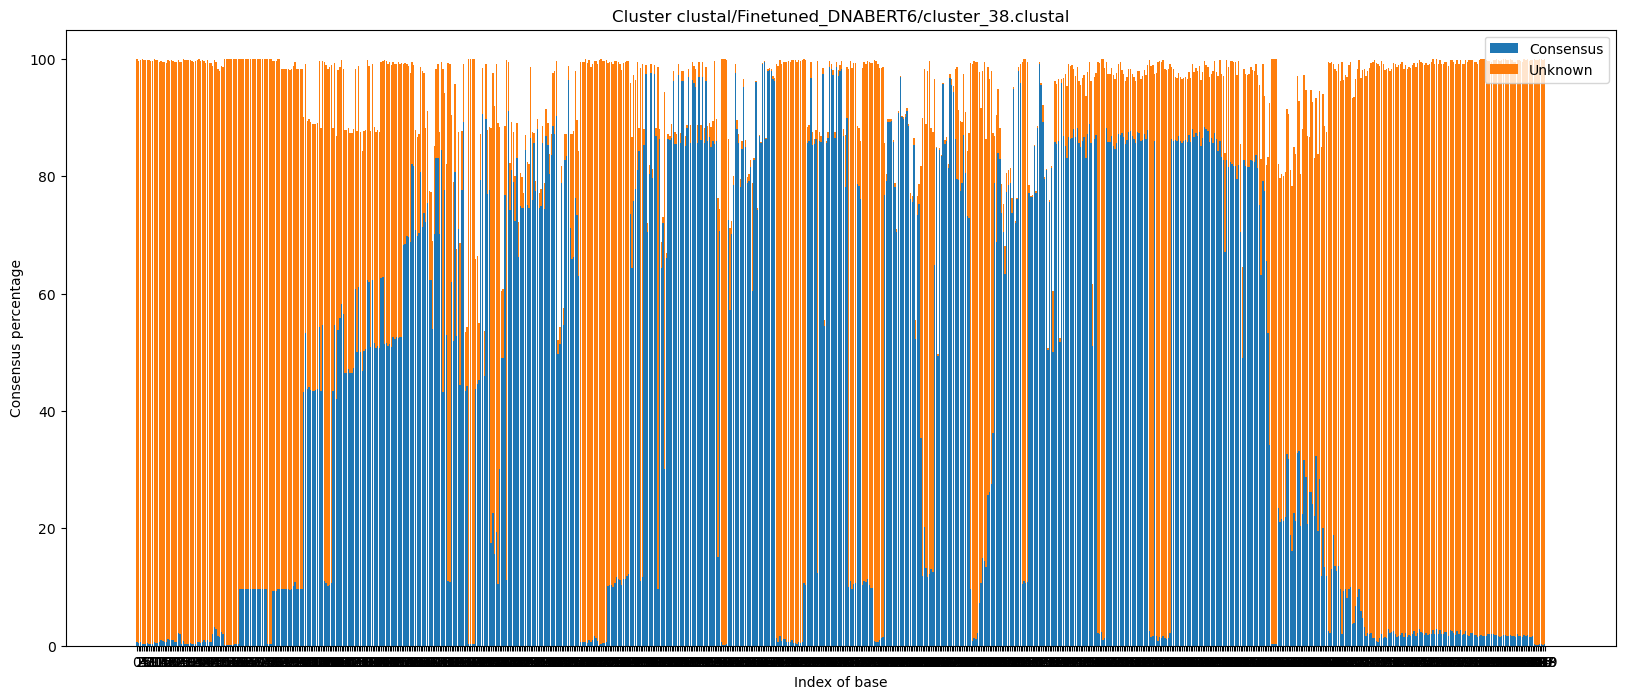

Plot for cluster 39


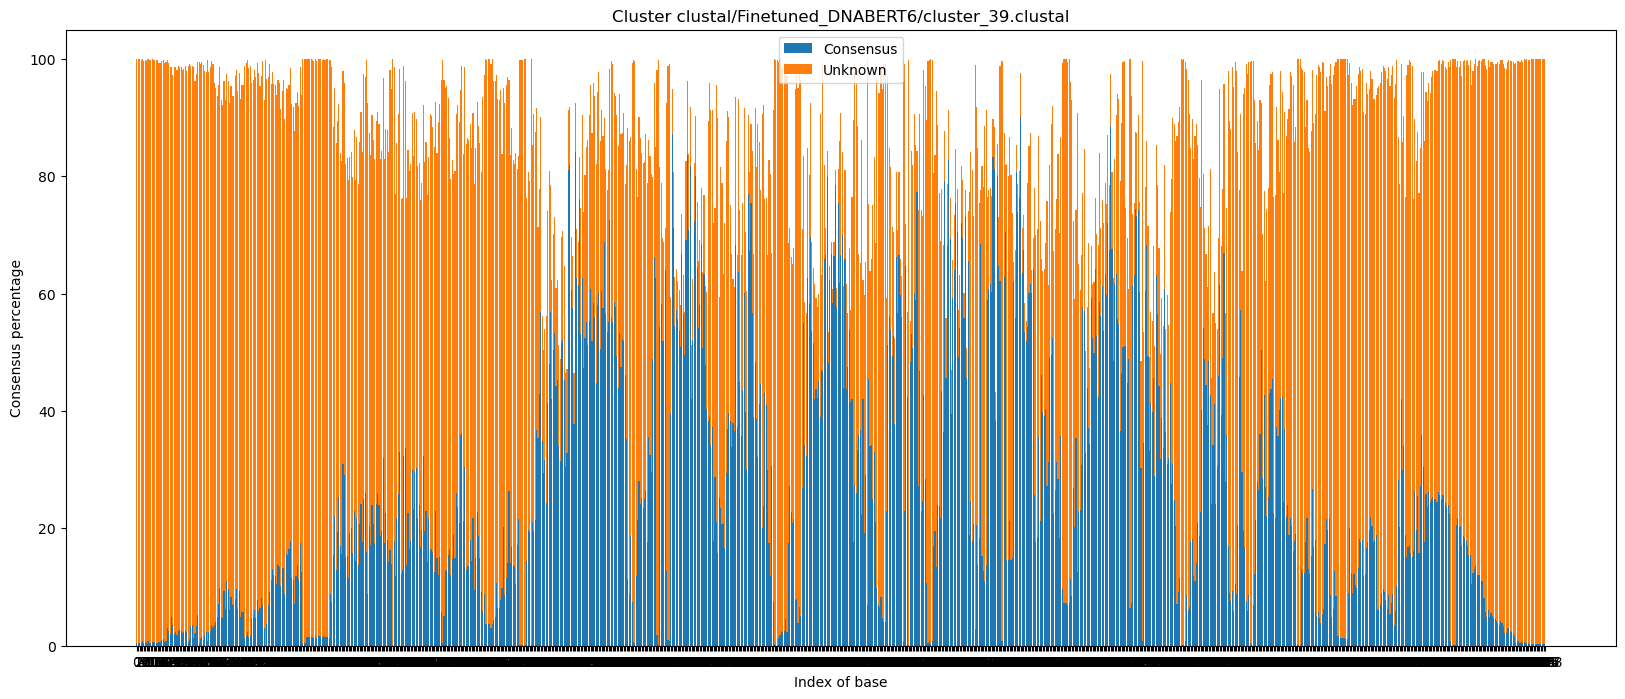

Plot for cluster 40


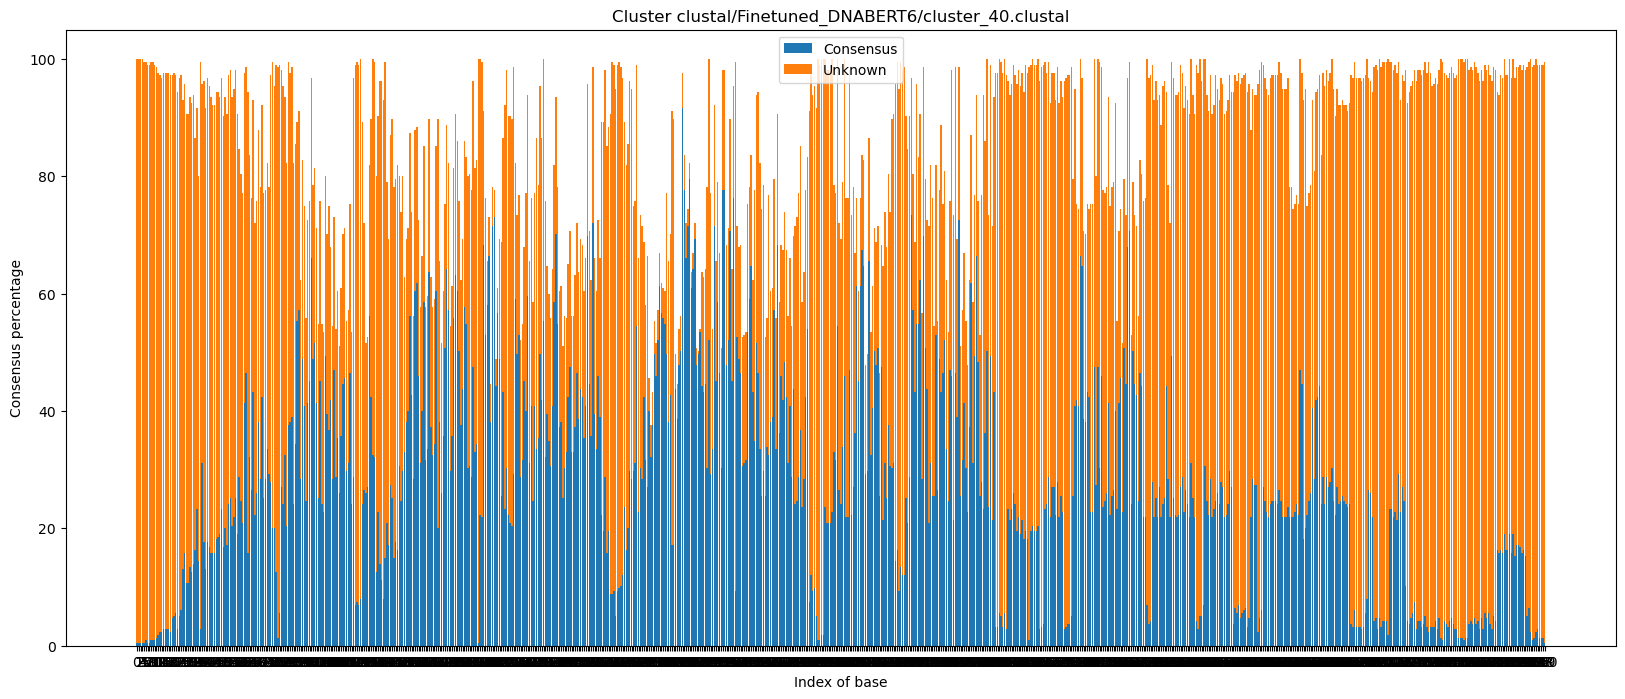

Plot for cluster 41


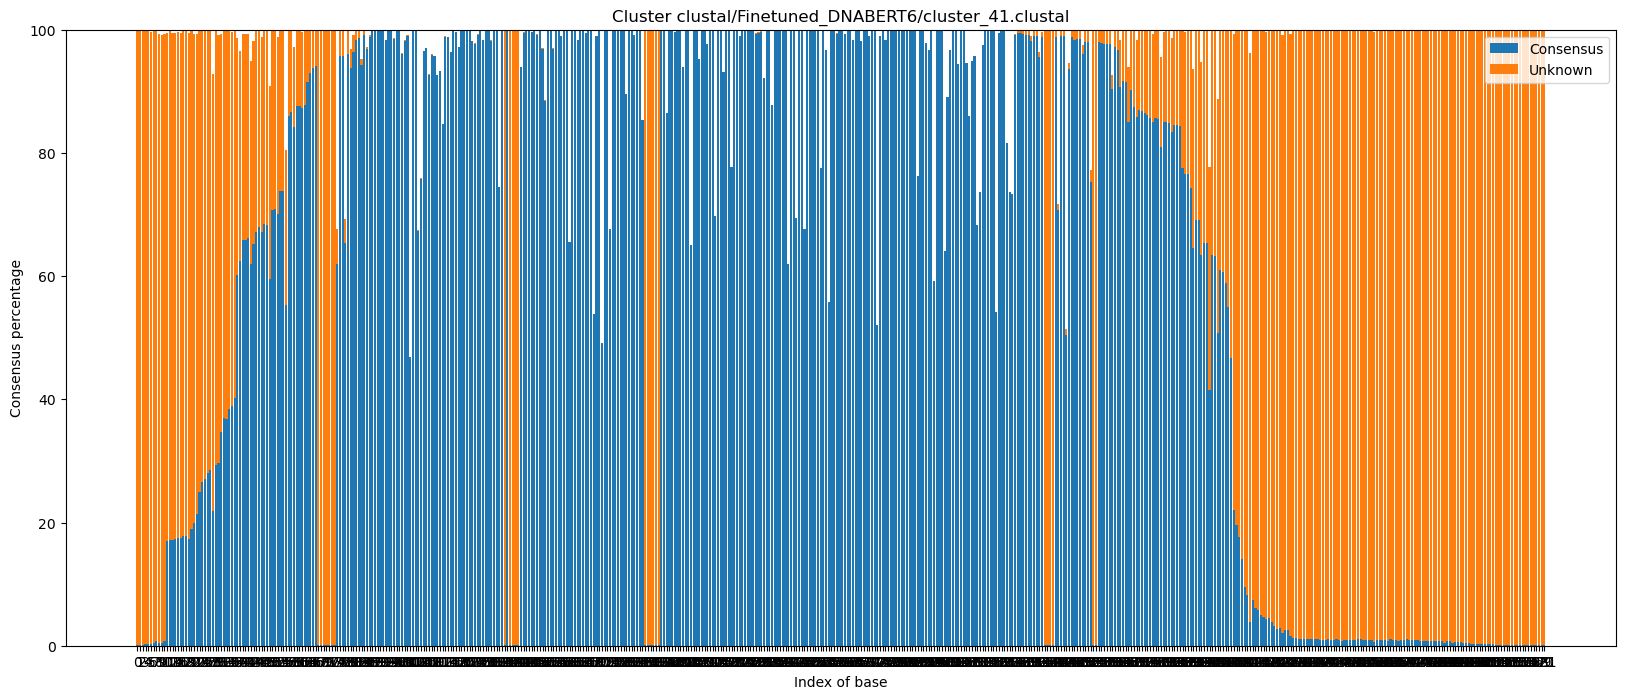

Plot for cluster 42


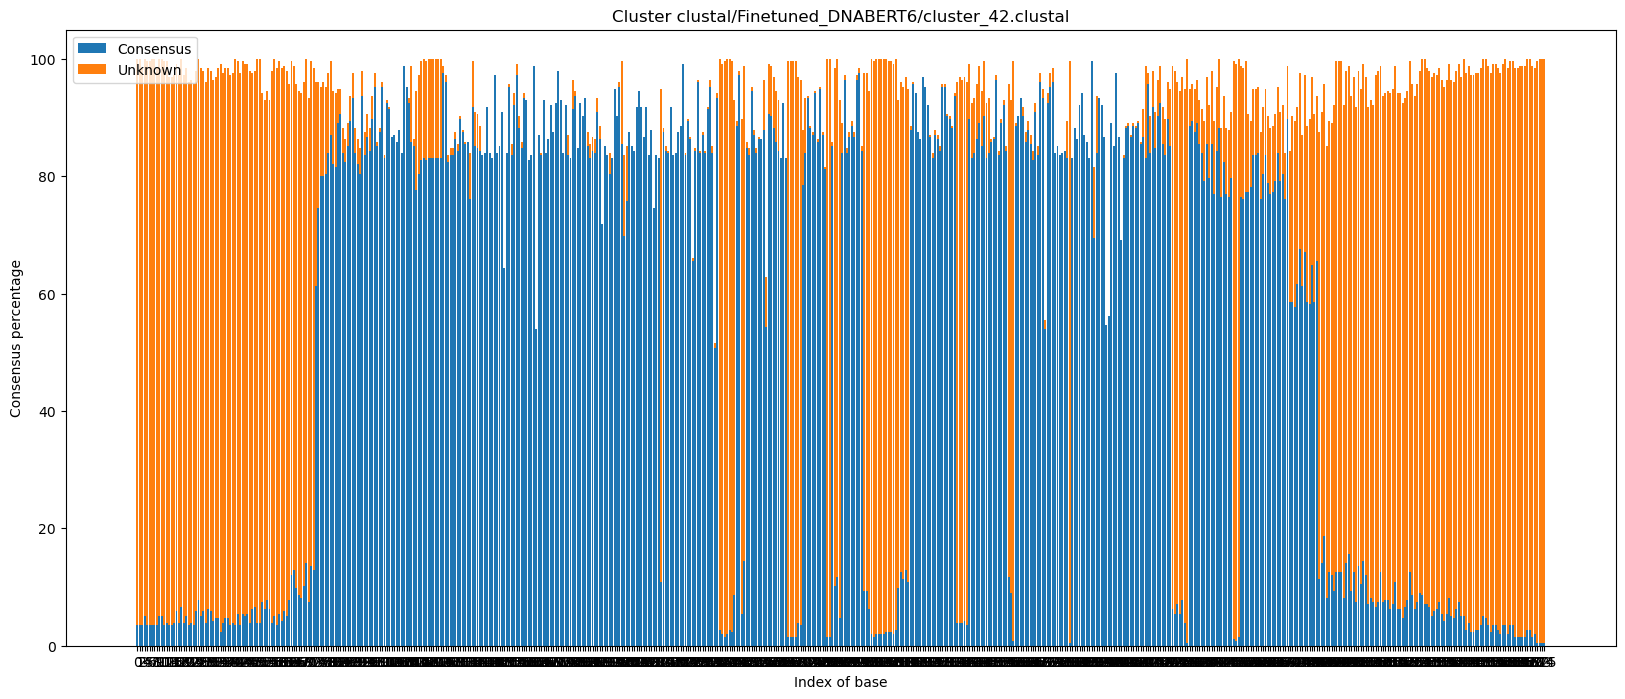

Plot for cluster 43


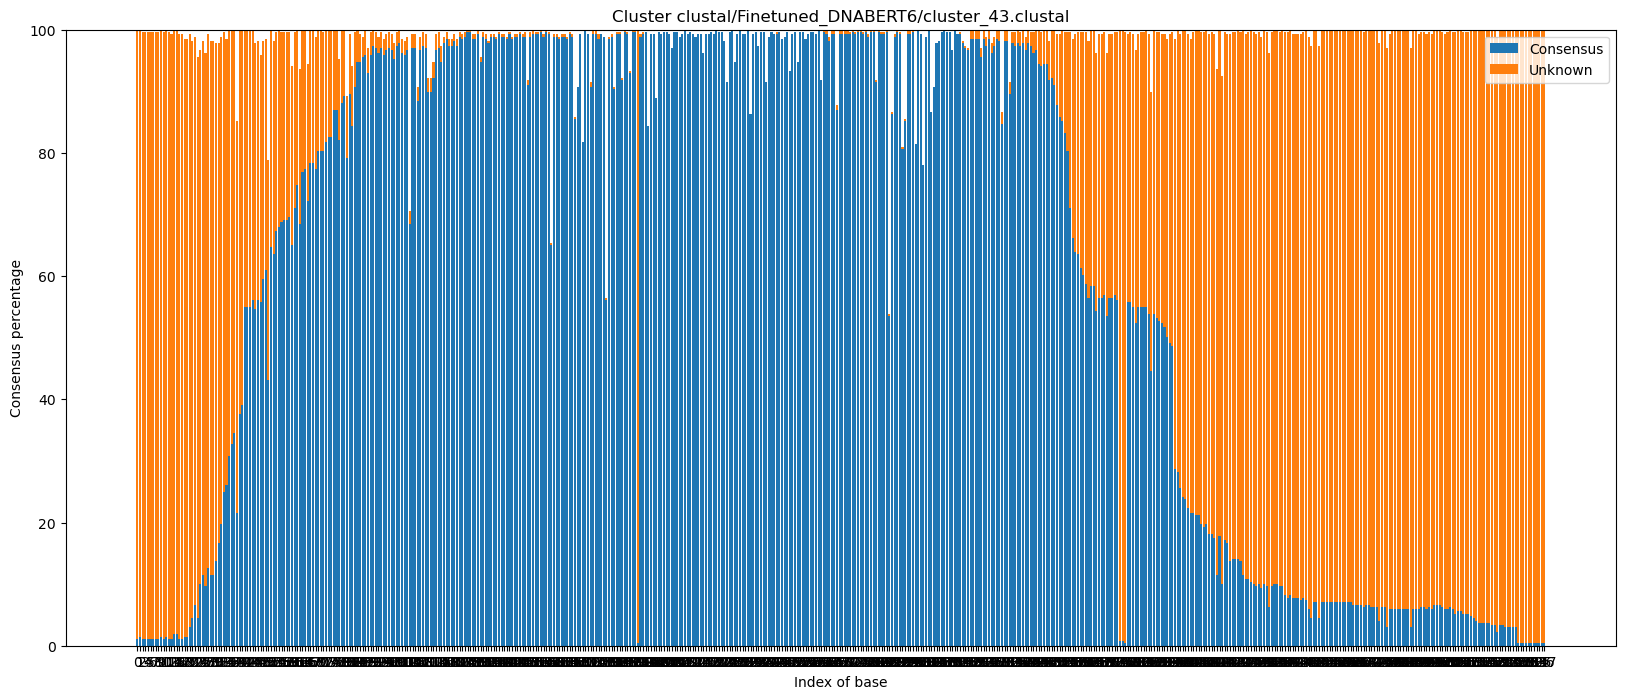

Plot for cluster 44


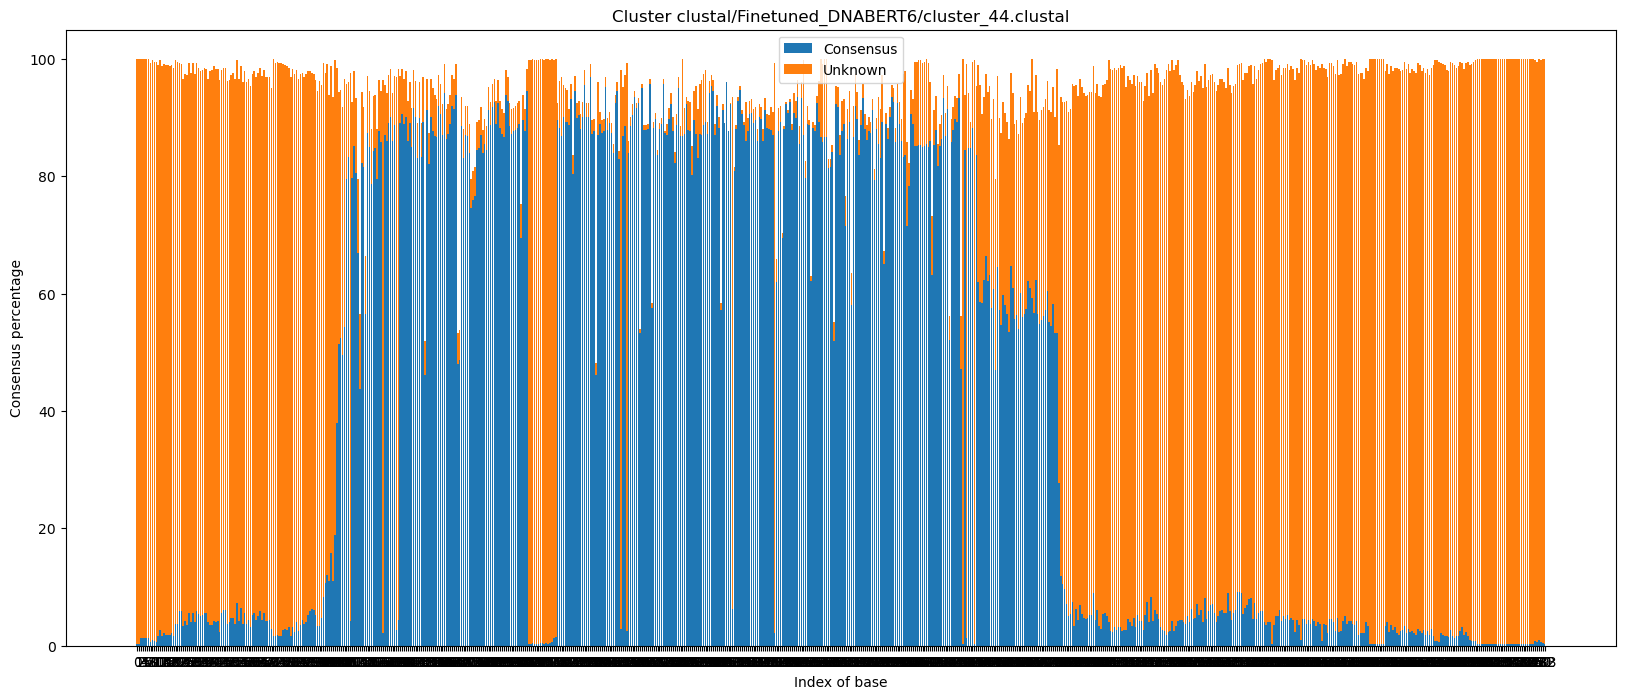

In [31]:
plotClusterRange(architecture_name, 0, num_clusters, unique_labels)

In [21]:
print(np.mean(gap_percentages))
print(np.median(gap_percentages))
print(np.std(gap_percentages))

50.32607302603544
54.23366555924696
13.31395317833031


In [25]:
scores, normalized_scores, sum_scores, div_scores = primerExtractionScoreOnModel(architecture_name, cluster_labels, unique_labels, stride=1)

In [26]:
print(scores)
print(normalized_scores)
print(sum_scores)
print(div_scores)

[99.97315436241611, 94.88295687885011, 0, 0, 0, 97.39212175470007, 93.3135593220339, 0, 94.88888888888889, 98.33035714285714, 0, 0, 0, 72.39917695473251, 0, 0, 98.69486404833837, 88.53923076923077, 91.67235494880546, 0, 93.45454545454545, 88.10606060606061, 92.3668903803132, 71.56621004566209, 98.29411764705883, 0, 0, 0, 96.00308641975309, 81.35172413793103, 0, 76.11023622047244, 99.70588235294117, 96.69465648854961, 0, 0, 80.8264556246467, 0, 83.50694444444444, 0, 0, 96.33371298405467, 87.2890625, 98.57992565055763, 87.4446764091858]
[0.3724  1.1552  0.      0.      0.      5.43935 1.1011  0.      4.7397
 0.55065 0.      0.      0.      0.87965 0.      0.      0.8167  5.75505
 4.029   0.      0.1028  1.163   2.0644  0.78365 0.1671  0.      0.
 0.      1.55525 1.1796  0.      1.20825 0.42375 1.2667  0.      0.
 3.57455 0.      1.80375 0.      0.      4.22905 0.55865 0.66295 1.04715]
46.629400000000004
1.036208888888889


In [27]:
np.count_nonzero(normalized_scores)/len(unique_labels)

0.5777777777777777

In [28]:
sequences_list = list(SeqIO.parse("Data/rbcL.fasta" , "fasta"))
family_count_per_cluster, family_frequencies_per_cluster = getFamiliesPerCluster(cluster_labels, unique_labels, getIDs("Data/rbcL_ids.txt"), getIDFamilyMapping(sequences_list))

In [30]:
print(family_count_per_cluster)
print(family_frequencies_per_cluster)

{0: 137, 1: 410, 2: 1365, 3: 183, 4: 787, 5: 1502, 6: 410, 7: 605, 8: 1374, 9: 203, 10: 494, 11: 1195, 12: 988, 13: 421, 14: 503, 15: 505, 16: 277, 17: 1681, 18: 1237, 19: 1046, 20: 41, 21: 448, 22: 684, 23: 378, 24: 67, 25: 1041, 26: 671, 27: 126, 28: 530, 29: 469, 30: 1200, 31: 528, 32: 153, 33: 429, 34: 1139, 35: 1145, 36: 1233, 37: 344, 38: 676, 39: 791, 40: 195, 41: 1210, 42: 226, 43: 236, 44: 392}
{0: {'philippinensis': 2, 'aethiopicum': 1, 'leucocarpa': 1, 'bartramioides': 1, 'cathayensis': 1, 'millei': 1, 'semibaccatum': 1, 'scaber': 1, 'minima': 1, 'verum': 2, 'harry-smithii': 1, 'celebicum': 1, 'smithiana': 1, 'wadei': 1, 'macrocarpa': 1, 'appendiculatum': 1, 'cryptandrus': 1, 'aadishankarii': 1, 'filiformis': 1, 'davidii': 1, 'x': 2, 'macropoda': 1, 'chrysantha': 1, 'auricoma': 1, 'palustris': 2, 'asperiflora': 1, 'julacea': 1, 'thermalis': 1, 'lateriflorum': 1, 'hypsophila': 1, 'psychotrioides': 1, 'bracteata': 1, 'megalophylla': 1, 'simulans': 1, 'virginiana': 1, 'centroch